<a href="https://colab.research.google.com/github/rakanakml/Group5-Case-1-Datmin/blob/main/Case_1_EDA_DatMin_Group_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

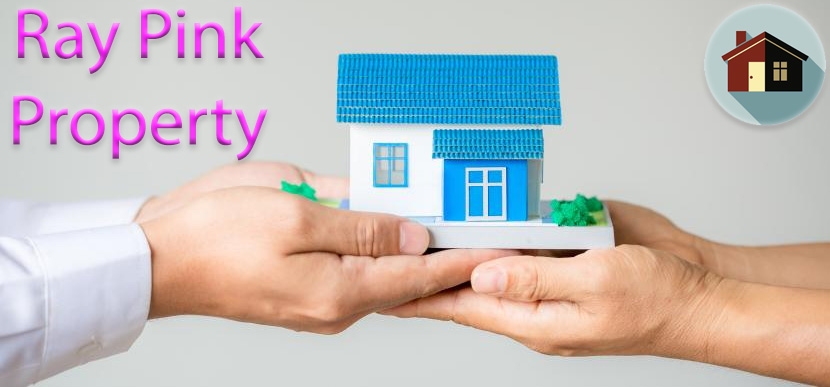

# **Data Mining Project 1 Group 5**

Anggota:
1.   Adawia Ananda (2106724883)
2.   Audrey Aliyya M (2106725091)
3.   Niken Salsabila Helmelia (2106724933)
4.   Muhammad Rakan Akmal (2106635745)
5.   Rifa Nayaka Utami (2106632163)






## **Kasus:**
* Anda adalah seorang Data Analyst yang bekerja di PT Ray Pink Property Indonesia (RPPI).
* RPPI adalah perusahaan property yang berdiri sejak 11 tahun yang lalu.
* RPPI memliki kantor cabang di 7 propinsi di Indonesia dan jumlahnya terus bertambah.
* Valuasi RPPI tahun ini mencapai Rp 7 Trilyun, meningkat 7% dari tahun sebelumnya.
* Bidang usaha RPPI adalah investasi dan jual-beli property secara umum, termasuk bekerja sama dengan developer perumahan.
* Data Engineer (DE)/Database Administrator (DBA) RPPI berhasil mengumpulkan data rumah-rumah yang dijual di beberapa kota di Indonesia.
* Sebagai Data Analyst anda akan hadir dan melakukan presentasi pada rapat direksi untuk memberikan insight dari data ke upper management (C-Level, senior managers, dan komisaris perusahaan).
* Di studi kasus ini anda mempersiapkan "bahan presentasi" (cukup ipynb saja) dengan cara melakukan EDA pada data yang diterima dari DE/DBA.

## **Petunjuk:**
Di studi kasus pertama, anda mendapat bantuan keterangan dari manajemen. Setelah berdiskusi over lunch dengan beberapa manager senior, anda mendengar bahwa mereka ingin mengetahui:
1. Kualitas data yang dimiliki perusahaan.
2. Apakah ada saran perbaikan data ke DE/DBA perusahaan agar RPPI menjadi data driven company yang unggul.
3. Dari data yang ada, apakah ada kecenderungan rumah disuatu kota lebih mahal/murah dibandingkan kota lain?
4. Dari data yang ada, apakah bisa dibuat rekomendasi sebaiknya RPPI membuat kantor cabang berikutnya di kota mana? Mengapa? (Asumsikan RPPI belum memiliki cabang di kota-kota yang disebutkan di data).
5. Rumah dengan karakteristik seperti apa yang paling banyak dijual?
6. Jika RPPI ingin melakukan investasi (max) Rp. 25 Milyar minggu besok, apakah dari data anda dapat memberikan rekomendasi rumah mana saja yang akan berpotensi menghasilkan keuntungan bagi perusahaan?
7. Informasi berharga apa lagi yang bisa anda dapatkan dari data?

Data yang digunakan merupakan data rumah-rumah yang dijual di beberapa kota di Indonesia.

Sumber data awal: https://docs.google.com/spreadsheets/d/1bX2XqiOGFEszgmqMc5Ym2meC0qeNQEeQ/edit#gid=778409302
Data di-*download* pada tanggal 25 September 2023.
Data hasil *download*: https://docs.google.com/spreadsheets/d/1VuMxb5gOJfwj4cmW64VESZa4X_Rf10I_/edit#gid=778409302

Tujuan EDA yang dilakukan adalah memperoleh *insight* dari data untuk diberikan kepada *upper management*.

# **Prepocessing**

## Library Preparation

In [ ]:
#import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msnum
from scipy.stats import skew
from scipy.spatial.distance import euclidean

## Load Data

In [ ]:
!gdown 1VuMxb5gOJfwj4cmW64VESZa4X_Rf10I_

Downloading...
From: https://drive.google.com/uc?id=1VuMxb5gOJfwj4cmW64VESZa4X_Rf10I_
To: /content/Salinan-Data-Property-Indonesia-Ganjil-2023.xlsx
100% 773k/773k [00:00<00:00, 94.4MB/s]


In [ ]:
df1 = pd.read_excel("/content/Salinan-Data-Property-Indonesia-Ganjil-2023.xlsx",
                    sheet_name='Bogor')
df2 = pd.read_excel("/content/Salinan-Data-Property-Indonesia-Ganjil-2023.xlsx",
                    sheet_name='Lampung - Sumatera selatan')
df3 = pd.read_excel("/content/Salinan-Data-Property-Indonesia-Ganjil-2023.xlsx",
                    sheet_name='Semarang')
df4 = pd.read_excel("/content/Salinan-Data-Property-Indonesia-Ganjil-2023.xlsx",
                    sheet_name='Kalimantan (All)')
df5 = pd.read_excel("/content/Salinan-Data-Property-Indonesia-Ganjil-2023.xlsx",
                    sheet_name='Depok')
df6 = pd.read_excel("/content/Salinan-Data-Property-Indonesia-Ganjil-2023.xlsx",
                    sheet_name='Tangerang')
df7 = pd.read_excel("/content/Salinan-Data-Property-Indonesia-Ganjil-2023.xlsx",
                    sheet_name='Jakarta')
df8 = pd.read_excel("/content/Salinan-Data-Property-Indonesia-Ganjil-2023.xlsx",
                    sheet_name='Bekasi')
df9 = pd.read_excel("/content/Salinan-Data-Property-Indonesia-Ganjil-2023.xlsx",
                    sheet_name='Padang - Palembang')
df10 = pd.read_excel("/content/Salinan-Data-Property-Indonesia-Ganjil-2023.xlsx",
                     sheet_name='Bandung')
df11 = pd.read_excel("/content/Salinan-Data-Property-Indonesia-Ganjil-2023.xlsx",
                     sheet_name='Medan')
df12 = pd.read_excel("/content/Salinan-Data-Property-Indonesia-Ganjil-2023.xlsx",
                     sheet_name='Surabaya')
df13 = pd.read_excel("/content/Salinan-Data-Property-Indonesia-Ganjil-2023.xlsx",
                     sheet_name='Yogyakarta')
df14 = pd.read_excel("/content/Salinan-Data-Property-Indonesia-Ganjil-2023.xlsx",
                     sheet_name='Bali')
df15 = pd.read_excel("/content/Salinan-Data-Property-Indonesia-Ganjil-2023.xlsx",
                    sheet_name='Sulawesi(All)')

Akan diintip isi dari masing-masing *dataframe* yang ada.

In [ ]:
df1.sample(n=5)

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,Unnamed: 13,deskripsi,Unnamed: 15
139,2021-04-12 00:00:00,84,36,2,1,0,1,Bojonggede,SHGB,1300,NaN,487800000,https://www.rumah.com/listing-properti/dijual-...,NaN,Green tajur village,NaN
265,19-09-2023,137,56,2,1,1,0,Bojonggede,SHM,3500,Timur Laut,890000000,https://www.rumah.com/listing-properti/dijual-...,NaN,"Rumah siap huni lokasi strategis, dekat dengan...",NaN
18,2021-06-12 00:00:00,90,79,3,2,0,1,Bogor Barat,SHM,2200,NaN,800000000,https://www.rumah.com/listing-properti/dijual-...,NaN,Seling point :Fasilitas Exclusive di Dalam Per...,NaN
13,2021-06-12 00:00:00,60,50,2,1,0,0,Babakan Madang,SHM,2200,Selatan,850000000,https://www.rumah123.com/properti/bogor/hos922...,NaN,"0 KM dari exit toll Babakan Madang., 5 menit G...",NaN
120,2021-01-12 00:00:00,220,213,3,3,1,2,Gunung Putri,SHM,3500,NaN,1350000000,https://www.rumah.com/listing-properti/dijual-...,NaN,"Akses Tol Jatikarya cububur dan Tol Jatiasih, ...",NaN


In [ ]:
df2.sample(n=5)

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga (Rp),URL,deskripsi
125,2023-06-06 00:00:00,120.0,120.0,3.0,3.0,0.0,2.0,"Ilir Timur li, Palembang",SHM,2200,NaN,1.300000e+09,"Rumah 2 Lantai Bagus di 8 Ilir, Palembang | Ru...","Akses Dekat mall PTC, Bebas banjir, Jalan masu..."
100,2023-07-06 00:00:00,69.0,55.0,2.0,1.0,1.0,1.0,"Tanjung Senang, Bandar Lampung",SHM,1300,Timur,2.300000e+08,https://www.rumah123.com/properti/bandar-lampu...,RUMAH MURAH STRATEGIS WAY KANDIS. RUMAH MODERN...
132,2023-06-06 00:00:00,122.0,90.0,3.0,3.0,0.0,1.0,"Seberang Ulu I, Palembang",SHM,1300,NaN,5.900000e+08,Dijual Rumah Taman Ogan Permai Jakabaring Pale...,"Cari Properti Murah Harga Dibawah Harga Pasar,..."
135,2023-06-06 00:00:00,96.0,40.0,2.0,1.0,0.0,1.0,"Alang Alang Lebar, Palembang",SHM,1300,Utara,3.750000e+08,Rumah Minimalis Ala Scandanavian Dikota Palemb...,"One gate sistem, security 24 jam, air pdam ats..."
21,2021-03-12 00:00:00,117.0,117.0,NaN,NaN,NaN,NaN,"Pringsewu, Jalan Ahmad Yani, Lampung",SHM,NaN,Utara,6.850000e+07,https://rumahdijual.com/lampung/11764150-tanah...,"tanah kavling tanpa riba, sumber air sumur bor..."


In [ ]:
df3.sample(n=5)

,Created_at,LT (m2),LB (m2),KT,KM,Garasi,Carport,Lokasi,Sertifikat,Listrik,Hadap,Harga,URL,Deskripsi
142,2023-06-06 00:00:00,220.0,440.0,4.0,4.0,1.0,2.0,Candi Golf,SHGB,3500.0,Utara,6.000000e+09,CANDI GOLF | Rumah123.com,"Dijual rumah baru 2,5 lantai di Candi Golf Sem..."
182,26-08-2023,162.0,250.0,5.0,3.0,0.0,2.0,Tembalang,SHM,3500.0,Timur,2.800000e+09,https://www.rumah123.com/properti/semarang/hos...,(Full Furnished) Rumah Citra Grand Sambiroto T...
24,06-12-2021,205.0,315.0,4.0,3.0,2.0,NaN,Kota Semarang,SHM,2200.0,NaN,2.500000e+09,https://www.rumah.com/listing-properti/dijual-...,"Lokasi di kawasan premium, dekat dari Cipto de..."
38,2021-07-11 00:00:00,320.0,396.0,7.0,7.0,NaN,3.0,Kabupaten Semarang,SHM,2200.0,NaN,1.700000e+09,https://www.rumah.com/listing-properti/dijual-...,- Rumah Ungaran Lokasi Strategis 100 m dari ja...
14,06-12-2021,120.0,60.0,2.0,1.0,NaN,2.0,Kota Semarang,SHM,1300.0,NaN,6.000000e+08,https://www.rumah123.com/properti/semarang/hos...,"tengah kota sampangan gajahmungkur, kawasan te..."


In [ ]:
df4.sample(n=5)

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
137,2023-07-06 00:00:00,366,174,6,4.0,1.0,4.0,"Pontianak Selatan, Pontianak",SHM,2200.0,Tenggara,1.600000e+09,https://www.rumah123.com/properti/pontianak/ho...,"Letak strategis di tepi jalan, dekat tempat ku..."
213,2023-06-06 00:00:00,814,217,4,2.0,0.0,NaN,"Jekan Raya, Palangkaraya",SHM,1300.0,NaN,8.500000e+08,https://www.rumah123.com/properti/palangkaraya...,Rumah Dijual Palangkaraya Dijual Rumah Tanah L...
77,2021-06-12 00:00:00,105,72,2,2.0,1.0,NaN,"Jalan Paris 1, Pontianak Tenggara, Pontianak, ...",SHM,2200.0,NaN,4.000000e+08,https://www.rumah.com/listing-properti/dijual-...,Dijual Rumah Suap Huni Plus Perabot\nAc 3 unit...
44,2021-06-12 00:00:00,100,96,2,1.0,NaN,1.0,"Kubu, Kubu Raya",SHM,1300.0,NaN,3.000000e+08,https://www.rumah123.com/properti/kubu-raya/ho...,Rumah Murah Parit Tengkorak || Komp. Taman Mawar
174,2023-09-11 00:00:00,270,100,3,1.0,0.0,1.0,"Wahana Asri, Balikpapan Selatan, Balikpapan",SHM,2200.0,NaN,1.600000e+09,https://www.rumah.com/listing-properti/dijual-...,Dijual Rumah Wahana Asri


In [ ]:
df5.sample(n=5)

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
10,2021-06-12 00:00:00,72,48,2.0,1.0,NaN,NaN,Sawangan,SHM,1300.0,Timur,470.0,https://www.rumah123.com/properti/depok/hos928...,CLuster Cantik Sawangan Harga All in biaya sur...
90,2021-05-12 00:00:00,55,47,2.0,2.0,NaN,1.0,Tapos,SHM,2200.0,Barat,498.0,https://www.rumah123.com/properti/depok/hos928...,Rumah murah di Cilangkap Tapos Depok Desain Me...
38,2021-05-12 00:00:00,249,260,3.0,2.0,NaN,NaN,Bojong Sari,Lainnya,2200.0,NaN,2500.0,https://www.rumah123.com/properti/depok/hos924...,Rumah bagus daerah reni jaya depok
84,2021-05-12 00:00:00,88,71,3.0,2.0,NaN,2.0,Beji,SHM,2200.0,Barat,1070.0,https://www.rumah123.com/properti/depok/hos928...,"Hunian Modern 2,5 Lantai Fasilitas Lengkap Lok..."
184,20-09-2023,70,70,3.0,2.0,NaN,2.0,Sukmajaya,SHM,2200.0,NaN,895000000.0,https://www.rumah.com/listing-properti/dijual-...,Rumah mewah akses 2 lantai dekat Margonda dan ...


In [ ]:
df6.sample(n=5)

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
161,2023-07-06 00:00:00,72,39,2.0,1,0.0,1.0,"KARAWACI, TANGERANG",SHM,1300.0,Selatan,648000000,https://www.rumah123.com/properti/tangerang/ho...,"Hanya 10 menit ke Gerbang Tol Karawaco, Gading..."
69,2021-12-06 00:00:00,93,93,2.0,1,NaN,1.0,"PAGEDANGAN, TANGERANG",SHM,1300.0,Utara,575,https://www.rumah123.com/properti/tangerang/ho...,Lokasi di belakang sekolah SD dekat dengan aks...
132,2023-06-06 00:00:00,81,61,2.0,2,0.0,1.0,Cisauk,SHGB,900.0,Utara,1100000000,https://www.rumah123.com/properti/tangerang/ho...,"Hunian nyaman dan aman, strategis, bebas banji..."
10,2021-12-06 00:00:00,60,48,3.0,2,2.0,2.0,"PONDOK JAGUNG, TANGERANG",SHM,2200.0,Tenggara,600,https://www.rumah123.com/properti/tangerang/ho...,Memiliki lokasi yang strategis yaitu 100 meter...
194,19-09-2023,72,43,2.0,1,1.0,NaN,Serpong,SHM,900.0,Barat Laut,1290,https://www.rumah.com/listing-properti/dijual-...,Rumah Seken Terawat Bebas Banjir Strategis Dek...


In [ ]:
df7.sample(n=5)

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
48,2021-12-06,47,90,3,3,NaN,1.0,Jakarta Barat,SHM,2200.0,NaN,1300000000,https://www.rumah.com/listing-properti/dijual-...,"Lokasi Strategis \n300 m ke Tol JORR \n1,6 Km ..."
2,2021-12-06,19,35,2,1,NaN,NaN,Jakarta Pusat,SHM,2200.0,NaN,395000000,https://www.rumah.com/listing-properti/dijual-...,"Dekat dengan Mall Atrium Senen, dekat dengan a..."
53,2021-11-29,49,80,3,2,NaN,NaN,Jakarta Barat,SHM,2200.0,Utara,850000000,https://www.rumah.com/listing-properti/dijual-...,"Lokasi strategis dipusat kota, jalan lebar 2 m..."
16,2021-12-05,50,115,3,2,1.0,NaN,Jakarta Pusat,SHM,2200.0,NaN,1200000000,https://www.rumah.com/listing-properti/dijual-...,"Lokasi aman dari banjir, dekat dengan kawasan ..."
141,2023-06-06,20,38,2,2,0.0,0.0,Jakarta Pusat,SHM,2200.0,Timur,440000000,https://www.rumah123.com/properti/jakarta-pusa...,RUMAH CLUSTER / JAKARTA PUSAT


In [ ]:
df8.sample(n=5)

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
35,2021-06-12 00:00:00,110,135,3,2.0,NaN,NaN,Kota Bekasi,SHM,2200.0,NaN,1170000000,https://www.rumah123.com/properti/bekasi/hos77...,"Dijual cepat jual rugi !!!, rumah cantik sanga..."
24,2021-06-12 00:00:00,60,40,2,1.0,1.0,1.0,Kota Bekasi,SHM,1300.0,Timur,375000000,https://www.rumah123.com/properti/bekasi/hos92...,"Dekat jalan raya, Dekat fasilitas umum seperti..."
156,2023-07-06 00:00:00,58,60,2,2.0,0.0,1.0,Bekasi Timur,SHM,2200.0,NaN,599000000,https://www.rumah123.com/properti/bekasi/hos13...,KEUNGGULAN :\n5 menit ke Tol Cibitung - Cilang...
15,2021-06-12 00:00:00,245,117,3,2.0,NaN,NaN,Kota Bekasi,SHM,2200.0,Timur,2750000000,https://www.rumah123.com/properti/bekasi/hos91...,"Rumah 1 lantai Hook, Lokasi yang Strategis dek..."
69,2021-04-12 00:00:00,105,130,3,3.0,NaN,1.0,Kota Bekasi,SHM,2200.0,Selatan,1200000000,https://www.rumah123.com/properti/bekasi/hos92...,Dijual cepat Rumah cantik rapih siap huni di b...


In [ ]:
df9.sample(n=5)

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
68,2021-11-30 00:00:00,137,70.0,3.0,1.0,1.0,NaN,Palembang,SHM,NaN,Timur,637.0,https://www.realoka.com/119122-560-jt-tipe-70-...,"560 Jt Tipe 70 Tanah 137 M2, KPR / Cash, Rumah..."
180,13-09-2023,400,250.0,4.0,5.0,NaN,1.0,"Padang Kota, Padang",SHM,5500,NaN,2000.0,https://www.rumah123.com/properti/padang/hos14...,Rumah Besar Full Furnished Di Komplek Dangau T...
20,2021-12-01 00:00:00,87,40.0,2.0,1.0,NaN,1.0,Padang,SHM,1300,Utara,300.0,https://www.rumah123.com/properti/padang/hos92...,Perumahan Mentari garden\nStatus : Unit pesan ...
133,2023-07-06 00:00:00,113,100.0,3.0,2.0,0.0,0.0,"Sako, Palembang",SHM,1300,NaN,275000000.0,https://www.rumah123.com/properti/palembang/ho...,Rumah Dijual Palembang rumah dalam komplek\n5 ...
158,2023-11-08 00:00:00,120,110.0,3.0,2.0,NaN,1.0,"Sako, Palembang",SHM,2200,NaN,600.0,https://www.rumah.com/listing-properti/dijual-...,"Rumah ini tidak hanya terawat dengan baik, tet..."


In [ ]:
df10.sample(n=5)

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
4,06 - 12 - 2021,224,231,4,3,NaN,1.0,Bandung Kota,SHM,2200.0,Timur,1.300000e+09,https://rumahdijual.com/bandung/9129940-rumah-...,SELLING POINT : 50 m ke STAIPI persis ( Sekola...
134,2023-07-06 00:00:00,120,80,3,2,1.0,1.0,Buah Batu,SHM,1300.0,Timur,4.500000e+08,https://www.rumah123.com/properti/bandung/hos1...,1. Lokasi sangat Strategis di bandung\n- Dekat...
191,23-08-2023,1071,1300,5,5,4.0,3.0,Dago,SHM,66000.0,Barat,5.000000e+10,https://www.rumah.com/listing-properti/dijual-...,"Jl. Kyai Gede Utama, sayao Dago - Bandung\nDij..."
164,2023-05-09 00:00:00,64,60,3,2,1.0,1.0,Antapani,SHM,2200.0,NaN,6.820000e+08,https://www.rumah123.com/properti/bandung/hos1...,Perumahan Islami di Kota Bandung yang menyuguh...
78,08 - 12 - 2021,81,45,2,1,1.0,1.0,Bandung Kota,SHM,NaN,NaN,4.990000e+08,https://www.rumah123.com/properti/bandung/hos9...,Dekat dengan Berbagai pusat pendidikan lainnya...


In [ ]:
df11.sample(n=5)

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
16,2021-02-12 00:00:00,400,275,4.0,4.0,NaN,2.0,Medan Selayang,SHM,NaN,NaN,2.950000e+09,https://www.rumah.com/listing-properti/dijual-...,"Dapatkan ""HARGA SPESIAL dan PROMO SPESIAL"" den..."
173,2023-11-09 00:00:00,120,80,2.0,1.0,0.0,1.0,Medan Helvetia,SHM,900.0,NaN,2.850000e+08,https://www.rumah.com/listing-properti/dijual-...,Rumah dijual Perumnas Helvetia Medan
158,15-09-2023,77,72,3.0,3.0,0.0,1.0,Medan Kota,SHM,NaN,Barat,2.100000e+09,https://rumah.com/listing-properti/dijual-diju...,Dijual Ruko Jl. Sulawesi ( Daerah Seikera - Se...
48,2021-07-12 00:00:00,475,475,2.0,1.0,NaN,NaN,Medan Area,SHM,NaN,Barat,6.500000e+09,https://www.olx.co.id/item/rumah-di-jl-madong-...,"1Tkt\nButuh Renov\n6.5M, Nego\nKelvin Tanady\n..."
126,2023-06-06 00:00:00,102,75,3.0,2.0,0.0,1.0,Medan Sunggal,SHM,1300.0,Timur,8.300000e+08,Rumah 2 Lantai Di Setia Budi (Sebelah Komplek ...,"Rumah Murah, Strategis Di Setia Budi Bersebela..."


In [ ]:
df12.sample(n=5)

,Created_at,LT(m²),LB(m²),KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,Deskripsi
188,20-09-2023,240.0,290,5,5,1.0,2.0,Citraland,SHM,4400,Selatan,4300000000,https://www.rumah123.com/properti/surabaya/hos...,*TERMURAAAAHH*\nDijual Cepattt Rumah\nBaru Gre...
64,2021-12-06 00:00:00,100.0,120,4,4,NaN,NaN,Kenjeran,SHM,2200,barat,1800000000,https://rumahdijual.com/surabaya/11761740-ruma...,"Jual rumah Lebak indah utara\nNEW, MINIMALIS\n..."
73,2021-12-06 00:00:00,240.0,500,6,7,NaN,NaN,Sambikerep,SPPJB,NaN,utara,6500000000,https://rumahdijual.com/surabaya/9427227-rumah...,"(STY)Waterfront\nLt 240 m2 (12x20), Lb 500 m2,..."
17,2021-10-06 00:00:00,90.0,110,3,2,1.0,NaN,Sambikerep,SPPJB,2200,utara,1800000000,https://www.rumah.com/listing-properti/dijual-...,"Hanya selangkah dari Fresh Market ,Bonus 3 AC,..."
77,2021-12-06 00:00:00,72.0,103,3,3,NaN,NaN,Tambaksari,SHM,NaN,timur,1450000000,https://www.olx.co.id/item/baru-gress-rumah-le...,BARU GRESS Rumah Lebak Jaya selangkah dr Raya ...


In [ ]:
df13.sample(n=5)

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
82,29-11-2021,86,65,3,1,NaN,NaN,Mantrijeron,SHM,NaN,NaN,850000000,https://www.rumah123.com/properti/yogyakarta/h...,Dijual Rumah Minimalis Model Mewah 3 kamar dek...
162,2023-08-09 00:00:00,139,104,4,3,1.0,0.0,Ngaglik,SHM,3500.0,NaN,1709900000,https://www.olx.co.id/item/rumah-mewah-private...,info Sekitar Lokasi:\n1 Menit ke Klinik Dokter...
194,23-09-2023,160,165,10,10,0.0,4.0,Sleman,SHM,1300.0,NaN,2900000000,https://www.rumah123.com/properti/sleman/hos14...,"Kos Eksklusif Full Penghuni Jalan Magelang km 5,5"
138,2023-07-06 00:00:00,125,200,4,4,1.0,1.0,Maguwoharjo,SHM,5500.0,Utara,1300000000,https://www.rumah123.com/properti/yogyakarta/h...,RUMAH MEWAH 2 LANTAI DALAM PERUMAHAN ELITE SEC...
156,2023-07-06 00:00:00,72,48,3,2,0.0,1.0,Bantul,SHM,1300.0,NaN,510000000,https://www.rumah123.com/properti/yogyakarta/h...,Keunggulan Lokasi :\n- 75 m dari Akses Jalan N...


In [ ]:
df14.sample(n=5)

,created_at,LT (M2),LB (M2),KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,Deskripsi
91,2021-07-12 00:00:00,101.0,40.0,2,1,NaN,1.0,Tabanan,SHM,1300.0,Utara,376000111,https://www.olx.co.id/item/rumah-tabanan-murah...,Rumah minimalis lantai 1 yg berlokasi di jln. ...
170,15-09-2023,300.0,200.0,2,2,0.0,1.0,Bangli,SHM,3500.0,NaN,1600000000,https://www.rumah.com/listing-properti/dijual-...,"Dijual vila vew, lembah dengan suasana tenang ..."
9,2021-06-12 00:00:00,300.0,120.0,2,2,NaN,NaN,Denpasar,SHM,2200.0,NaN,2200000000,https://www.rumah123.com/properti/denpasar/hos...,"2 menit ke Poltekkes Denpasar,2 menit ke SMAN ..."
162,2023-06-09 00:00:00,100.0,72.0,2,2,0.0,1.0,Tanah Lot,SHM,1300.0,Timur,1400000000,https://www.rumah.com/listing-properti/dijual-...,"Rumah Dijual semi vila,lingkungan tenang dan n..."
104,29-05-2023,134.0,130.0,3,3,0.0,1.0,Badung,SHM,4400.0,Timur,1650000000,"Villa 3 Km Tidur, Ada Pool, Aquarium, di Perum...","Perumahan yang elite, dekat Hotel GoodWay Nusa..."


In [ ]:
df15.sample(n=5)

,created_at,LT,LB,KT,KM,Garasi,Carport,Lokasi,Sertifikat,Listrik,Hadap,Harga,URL,Deskripsi
110,2023-06-06 00:00:00,257,472,4,2,2,1,"Panakukkang, Makassar",SHM,1300,Selatan,2910000000,https://www.rumah123.com/properti/makassar/hos...,Satu Unit Rumah Tinggal 2 (dua) Lantai dekat m...
99,15 - 10 - 2021,180,100,3,2,-,-,"Tikala, Manado",SHM,2200,Utara,RP. 850.000.000,https://www.rumah123.com/properti/manado/hos90...,Lokasi rumah cantik dan menarik ini berada di ...
126,2023-02-09 00:00:00,60,48,2,1,0,1,"Biring Kanaya, Makassar, Sulawesi Selatan",-,-,-,559880000,https://www.olx.co.id/item/perumahan-dijual-st...,Perumahan Dijual Strategis di Virginia Park Ma...
20,11 - 12 - 2020,150,42,2,1,-,-,"Jl. Hasanudin Toto, Palu Kota",SHM,-,Utara,RP. 250.000.000,https://www.realoka.com/117686-di-jual-cepat-r...,Lokasi Perumahan yang berdekatan dengan objek ...
84,12 - 11 - 2021,90,45,2,1,-,1,"Mapanget, Manado",SHM,1300,-,RP. 460.000.000,https://www.rumah123.com/properti/manado/hos91...,PROMO 11.11 KEEP RUMAH MURAH MANADO HANYA 500r...


## Penambahan Variabel Wilayah


Dilakukan penambahan kolom `Wilayah` sesuai nama wilayah pada tiap dataframe karena akan dilakukan penggabungan dataframes.



In [ ]:
df1['Wilayah'] = 'Bogor'
df2['Wilayah'] = 'Lampung-Sumatera Selatan'
df3['Wilayah'] = 'Semarang'
df4['Wilayah'] = 'Kalimantan'
df5['Wilayah'] = 'Depok'
df6['Wilayah'] = 'Tangerang'
df7['Wilayah'] = 'Jakarta'
df8['Wilayah'] = 'Bekasi'
df9['Wilayah'] = 'Padang-Palembang '
df10['Wilayah'] = 'Bandung'
df11['Wilayah'] = 'Medan'
df12['Wilayah'] = 'Surabaya'
df13['Wilayah'] = 'Yogyakarta'
df14['Wilayah'] = 'Bali'
df15['Wilayah'] = 'Sulawesi'

Akan dilihat nama kolom pada tiap dataframe untuk memastikan apakah terdapat keanehan dan/atau memiliki nama kolom yang sama atau tidak.

In [ ]:
print("Variabel df1:", df1.dtypes)
print("Variabel df2:", df2.dtypes)
print("Variabel df3:", df3.dtypes)
print("Variabel df4:", df4.dtypes)
print("Variabel df5:", df5.dtypes)
print("Variabel df6:", df6.dtypes)
print("Variabel df7:", df7.dtypes)
print("Variabel df8:", df8.dtypes)
print("Variabel df9:", df9.dtypes)
print("Variabel df10:", df10.dtypes)
print("Variabel df11:", df11.dtypes)
print("Variabel df12:", df12.dtypes)
print("Variabel df13:", df13.dtypes)
print("Variabel df14:", df14.dtypes)
print("Variabel df15:", df15.dtypes)

Variabel df1: created_at      object
LT               int64
LB               int64
KT               int64
KM               int64
garasi           int64
carport          int64
lokasi          object
sertifikat      object
listrik          int64
hadap           object
harga            int64
URL             object
Unnamed: 13    float64
deskripsi       object
Unnamed: 15     object
Wilayah         object
dtype: object
Variabel df2: created_at     object
LT            float64
LB            float64
KT            float64
KM            float64
garasi        float64
carport       float64
lokasi         object
sertifikat     object
listrik        object
hadap          object
harga (Rp)    float64
URL            object
deskripsi      object
Wilayah        object
dtype: object
Variabel df3: Created_at     object
LT (m2)       float64
LB (m2)       float64
KT            float64
KM            float64
Garasi        float64
Carport       float64
Lokasi         object
Sertifikat     object
Listrik    

Pada df1 yang merepresentasikan dataframe untuk wilayah bogor, terdapat kolom `Unnamed: 13` dan `Unnamed: 15`. Kedua kolom tersebut tidak memiliki nilai sehingga dapat disimpulkan tidak bermakna. Dengan demikian, kedua kolom tersebut akan di-*drop*.

In [ ]:
df1 = df1.drop(["Unnamed: 13", "Unnamed: 15"], axis=1)

## Merge Data

Kelima belas dataframes yang ada digabungkan menjadi satu dataframe.

In [ ]:
# Mengganti Nama Kolom Menjadi Sama pada Tiap Dataframes

#list dataframes
df_list = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15]

#nama kolom
new_names = ["Created_at","LT", "LB", "KT", "KM", "Garasi", "Carport", "Lokasi",
            "Sertifikat", "Listrik", "Hadap", "Harga", "URL", "Deskripsi", "Wilayah"]

#loop
for df in df_list:
    df.rename(columns=dict(zip(df.columns[:15], new_names)), inplace=True)

In [ ]:
#penggabungan dataframes
df = pd.concat([df1, df2, df3,
                df4, df5, df6,
                df7, df8, df9,
                df10, df11, df12,
                df13, df14, df15], axis=0, ignore_index=True)

Dataframes yang diperoleh sebelum penggabungan dihapus karena tidak digunakan pada pengolahan lebih lanjut. Dengan demikian, memori yang digunakan dapat berkurang.

In [ ]:
#penghapusan dataframes
del df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15

In [ ]:
#mengintip isi dataframes yang baru
df.sample(n=5)

,Created_at,LT,LB,KT,KM,Garasi,Carport,Lokasi,Sertifikat,Listrik,Hadap,Harga,URL,Deskripsi,Wilayah
1960,23 - 11 - 2021,72,38,2,1,NaN,1.0,Bandung Kabupaten,SHM,1300.0,Selatan,450000000.0,https://www.realoka.com/219722-rumah-mewah-man...,Bismillah Assalamualaikum Ijin Ngalapak admin ...,Bandung
1811,2023-07-06 00:00:00,163,82.0,4.0,3.0,0.0,2.0,"Ilir Timur li, Palembang",SHM,5500,Timur,1200000000.0,https://www.rumah123.com/properti/palembang/ho...,Miliki Segera Hunian Ekslusif Dekat Sekolah IG...,Padang-Palembang
1561,2021-04-12 00:00:00,160,180,4,2.0,NaN,NaN,Kota Bekasi,SHM,2200.0,NaN,1400000000,https://www.rumah123.com/properti/bekasi/hos92...,"Dijual Rumah siap huni di Cluster Taman Sari, ...",Bekasi
160,2021-05-12 00:00:00,97,58,2,1,0,1,Sukaraja,SHM,1300,NaN,915000000,https://www.rumah.com/listing-properti/dijual-...,"Rumah siap huni, dekat dengan Stasiun Cilebut ...",Bogor
1795,2023-06-06 00:00:00,90,140.0,2.0,3.0,0.0,1.0,"Ilir Timur li, Palembang",SHM,2200,NaN,1110.0,Townhouse lokasi strategis harga menarik | Rum...,Rumah Dijual Palembang Townhouse lokasi strate...,Padang-Palembang


## Mengatasi Duplikasi Data

Kami akan melihat duplikasi data yang memiliki semua nilai kolom yang sama kecuali pada kolom `Created_at`. Hal ini dilakukan untuk melihat apakah ada rumah yang sama, namun bisa saja rumah yang sama dijual dengan memposting ulang di waktu yang berbeda.

In [ ]:
#melihat duplikasi data
columns_to_check = df.columns.difference(['Created_at'])
duplicate_rows = df.duplicated(subset=columns_to_check, keep='first')
print('Banyaknya duplikasi data:', duplicate_rows.sum(), 'records')

Banyaknya duplikasi data: 21 records


In [ ]:
#hapus duplicated
df.drop_duplicates(subset=columns_to_check, keep='first', inplace=True)
print((df.duplicated(subset = columns_to_check, keep = 'first')).sum())

0


Sudah tidak terdapat duplikasi pada data.

## Mengatasi Missing Values

Akan dilihat banyaknya *missing values* pada data beserta persentasenya.

<Axes: >

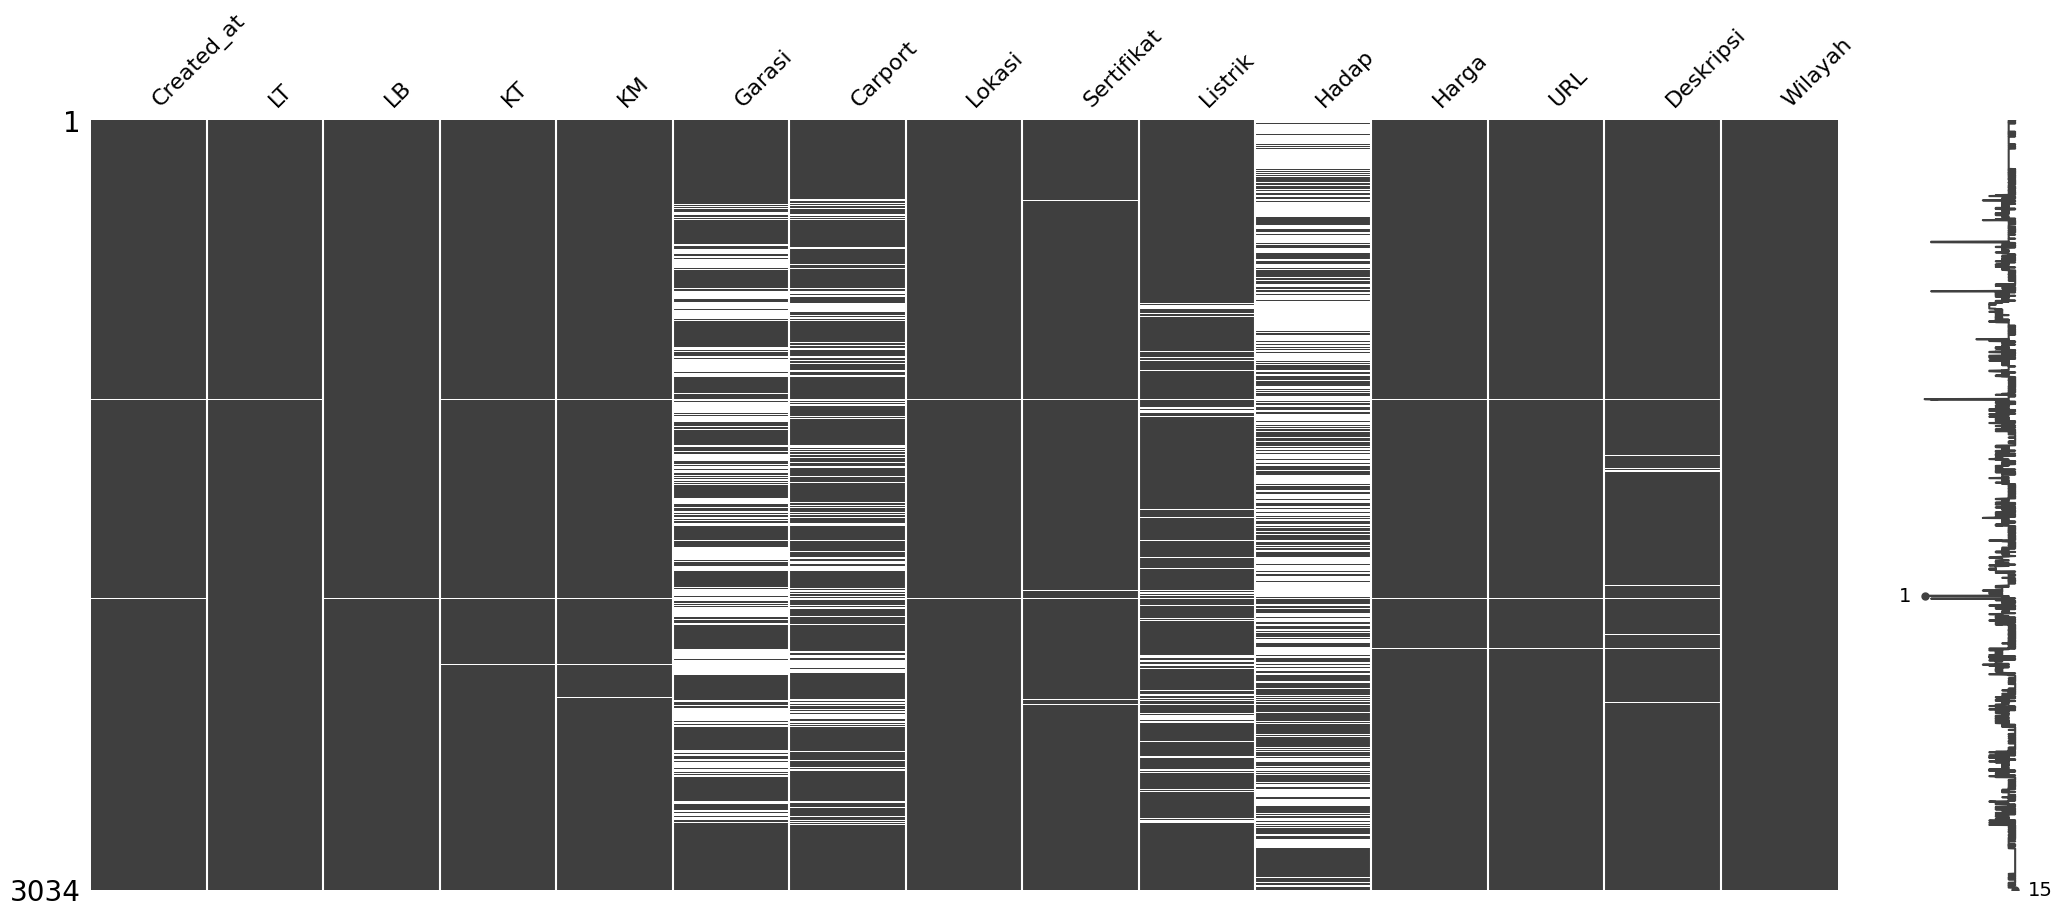

In [ ]:
msnum.matrix(df)

In [ ]:
print("\nBanyaknya NaN pada data adalah sebagai berikut. \n{}\n".format(df.isnull().sum()))
print((df.isnull().sum()/len(df)*100).to_frame('persentase missing'))


Banyaknya NaN pada data adalah sebagai berikut. 
Created_at       8
LT               7
LB               8
KT              12
KM              14
Garasi        1060
Carport        563
Lokasi           9
Sertifikat      18
Listrik        233
Hadap         1647
Harga           12
URL             12
Deskripsi       30
Wilayah          0
dtype: int64

            persentase missing
Created_at            0.263678
LT                    0.230719
LB                    0.263678
KT                    0.395517
KM                    0.461437
Garasi               34.937376
Carport              18.556361
Lokasi                0.296638
Sertifikat            0.593276
Listrik               7.679631
Hadap                54.284773
Harga                 0.395517
URL                   0.395517
Deskripsi             0.988794
Wilayah               0.000000


In [ ]:
# Drop Wilayah merupakan variabel baru yang tidak mungkin berisi NaN
print("Jumlah baris dengan semua kolom selain kolom 'Wilayah' adalah NaN:",
      len(df[df.drop(columns=['Wilayah']).isna().all(axis=1)]))

Jumlah baris dengan semua kolom selain kolom 'Wilayah' adalah NaN: 2


Akan dihapus *records* yang pada semua kolomnyan (kecuali kolom `Wilayah`) berisi *missing value*.  Kolom `Wilayah` dikecualikan karena merupakan kolom yang baru didefinisikan pada tahap *prepocessing* ini sehingga sudah pasti ada nilainya.

In [ ]:
df.dropna(subset=df.columns.difference(['Wilayah']), how='all', inplace=True)

In [ ]:
print("\nBanyaknya NaN pada data setelah membuang beberapa baris. \n{}\n".format(df.isnull().sum()))


Banyaknya NaN pada data setelah membuang beberapa baris. 
Created_at       6
LT               5
LB               6
KT              10
KM              12
Garasi        1058
Carport        561
Lokasi           7
Sertifikat      16
Listrik        231
Hadap         1645
Harga           10
URL             10
Deskripsi       28
Wilayah          0
dtype: int64



### Mengatasi *missing values* pada variabel `LT`, `LB`, dan `Created_at`

Karena *missing values* pada kolom `LT`, `LB`, dan `Created_at` memiliki *missing values* < 0.3% di data, maka akan dilihat terlebih dahulu *records-records* yang berisi *missing values* tersebut.

In [ ]:
# Menampilkan baris-baris di mana "LT" atau "LB" atau "Created_at" adalah NaN
ltlbcreated_nan = df[df['LT'].isna() | df['LB'].isna() | df['Created_at'].isna()]

ltlbcreated_nan

,Created_at,LT,LB,KT,KM,Garasi,Carport,Lokasi,Sertifikat,Listrik,Hadap,Harga,URL,Deskripsi,Wilayah
299,2021-05-12 00:00:00,391.0,NaN,7.0,7.0,NaN,NaN,"Teluk Betung Utara, Bandar Lampung",SHM,Token,NaN,1000000000.0,https://rumahdijual.com/lampung/10121111-rumah...,"sumber air tanah, bebas banjir, butuh renovasi",Lampung-Sumatera Selatan
479,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bangunan Gedung dengan Lahan Luas di Jalan Ahm...,Lampung-Sumatera Selatan
480,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Ruko 4 Pintu 4 Lantai Pringsewu, Lampung",Lampung-Sumatera Selatan
481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tanah & Bangunan di Wonogriyo Pringsewu,Lampung-Sumatera Selatan
674,19-09-2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Semarang
1100,NaN,NOTE:,lokasi yang kami gunakan hanya per kecamatan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Depok
1101,NaN,NaN,harga 119 data pertama adalah per satuan juta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Depok
1902,NaN,Keterangan = Harga dalam bentuk juta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Padang-Palembang


Pada *records* yang pada variabel `LT` atau `LB` atau `Created_at` berisi *missing values*, hampir semua variabel lainnya juga berisi *missing values*. Kecuali untuk records ke 289, yang berisi *missing values* hanya pada `LB`. Karena sulit untuk diimputasi dan/atau variabel lainya juga berisi *missing values* dan *missing values* < 0.3% data, maka *records* tersebut akan dihapus.

In [ ]:
# Menghapus baris-baris yang ada dalam ltlbcreated_nan dari DataFrame df
df.drop(ltlbcreated_nan.index, inplace=True)

### Mengatasi *missing values* pada variabel `KT`, `KM`, dan `LB`

Pada  `KT` dan `LB`, terdapat *records* yang berisi "-" yang artinya *missing value*. Nilai "-" akan dirubah menjadi *missing value* agar dapat dihitung berapakah *missing values* sebenarnya.

In [ ]:
df['KT'].replace('-', np.nan, regex=True, inplace=True)
df['KM'].replace('-', np.nan, regex=True, inplace=True)

In [ ]:
# Menghitung jumlah missing values pada kolom 'KT' dan 'KM'
missing_kt = df['KT'].isna().sum()
missing_km = df['KM'].isna().sum()

# Menghitung persentase missing values pada kolom 'KT' dan 'KM'
percentage_missing_kt = (missing_kt / len(df)) * 100
percentage_missing_km = (missing_km / len(df)) * 100

# Menampilkan persentase missing values pada kedua kolom
print(f'Persentase missing values pada kolom KT: {percentage_missing_kt:.2f}%')
print(f'Persentase missing values pada kolom KM: {percentage_missing_km:.2f}%')

Persentase missing values pada kolom KT: 0.23%
Persentase missing values pada kolom KM: 0.20%


Karena *missing values* pada kolom `KT` dan `LB` memiliki *missing values* < 0.25% di data, maka akan dilihat terlebih dahulu *records-records* yang berisi *missing values* tersebut.

In [ ]:
# Menampilkan baris-baris di mana "KT" atau "KM" adalah NaN
ktkm_nan = df[df['KT'].isna() | df['KM'].isna()]

ktkm_nan

,Created_at,LT,LB,KT,KM,Garasi,Carport,Lokasi,Sertifikat,Listrik,Hadap,Harga,URL,Deskripsi,Wilayah
316,2021-03-12 00:00:00,117.0,117.0,NaN,NaN,NaN,NaN,"Pringsewu, Jalan Ahmad Yani, Lampung",SHM,NaN,Utara,68500000.0,https://rumahdijual.com/lampung/11764150-tanah...,"tanah kavling tanpa riba, sumber air sumur bor...",Lampung-Sumatera Selatan
870,2023-08-18 00:00:00,215,40,2.0,NaN,NaN,NaN,"Landasan Ulin, Banjar Baru, Kalimantan Selatan",SHM,900.0,NaN,195000000.0,https://www.rumah.com/listing-properti/dijual-...,Dijual rumah sederhana di Komplek Sumber Cahay...,Kalimantan
1288,19-09-2023,98,118,NaN,3.0,2.0,NaN,"BSD, TANGERANG",SHM,2200.0,NaN,2400,https://www.rumah.com/listing-properti/dijual-...,Rumah 2 Lantai Type 7 SHM di Cluster Welton Hi...,Tangerang
1567,2021-03-12 00:00:00,364,494,5.0,NaN,1.0,NaN,Kota Bekasi,NaN,NaN,NaN,2485000000,https://www.iklanrumah.com/list/detail/37392/r...,Rumah Mewah Pondok Pekayon Indah Siap Huni di ...,Bekasi
2164,2021-06-12 00:00:00,96,66,NaN,NaN,NaN,NaN,Medan Deli,SHM,NaN,Selatan,2300000000.0,https://www.rumah123.com/properti/medan/hos928...,Villa Katalia Terrace\nDalam komplek cemara as...,Medan
2295,21-09-2023,62,75,2.0,NaN,0.0,1.0,Medan Timur,SHM,2200.0,NaN,775000000.0,https://www.rumah.com/listing-properti/dijual-...,"Bilal Home, Krakatau. Rumah Baru - Siap Huni, ...",Medan
2943,10 - 12 - 2021,257,436,16.0,NaN,-,-,"Malalayang, Manado",SHM,-,-,RP. 2.300.000.000,https://www.rumah123.com/properti/manado/hos93...,Dijual cepat rumah kos 16 kamar di winangun ko...,Sulawesi
2947,03 - 12 - 2021,120,52,NaN,1.0,1,1,"Wanea, Manado",HGB,1300,Timur,RP. 1.060.000.000,https://www.rumah123.com/properti/manado/hos92...,Lokasi rumah baru siap tinggal lengkap dengan ...,Sulawesi
2975,11 - 11 - 2021,90,45,NaN,1.0,-,1,"Mapanget, Manado",SHM,1300,-,RP. 405.000.000,https://www.rumah123.com/properti/manado/hos91...,PERUMAHAN MEWAH TERLARIS 2 MENIT DARI RS.AURI\...,Sulawesi
2980,04 - 11 - 2021,90,48,NaN,1.0,-,1,"Mapanget, Manado",SHM,1300,-,RP. 460.000.000,https://www.rumah123.com/properti/manado/hos91...,PERUMAHAN TERLARIS DI MANADO DP 10%\nLokasi : ...,Sulawesi


Karena persentase *missing values* pada `KT` dan `KM` < 0.25 dan beberapa kolom lainnya juga berisi *missing values*, maka *records-records* akan dihapuskan saja.

In [ ]:
# Menghapus baris-baris yang ada dalam ktkm_nan_nan dari DataFrame df
df.drop(ktkm_nan.index, inplace=True)

### Mengatasi *missing values* pada variabel `Garasi`, `Carport`, `Sertifikat`, dan `Deskripsi`

Pada  `Garasi` dan `Carport`, terdapat *records* yang berisi "-" yang artinya *missing value*. Nilai "-" akan dirubah menjadi *missing value* agar dapat dihitung berapakah *missing values* sebenarnya.

In [ ]:
df['Garasi'].replace('-', np.nan, regex=True, inplace=True)
df['Carport'].replace('-', np.nan, regex=True, inplace=True)

Diasumsikan bahwa *missing values* pada kolom `Garasi`, `Carport`, `Sertifikat`, dan `Deskripsi` menandakan bahwa rumah tersebut tidak memiliki `Garasi`, `Carport`, `Sertifikat`, atau `Deskripsi` secara berurutan. Dengan demikian, *missing values* pada `Garasi` dan `Carport` akan diimputasi dengan "0", sedangkan pada `Sertifikat` dan `Deskripsi` akan diimputasi dengan "Tidak Ada".

In [ ]:
#imputasi NaN Garasi dan Carport menjadi 0
df['Garasi'].fillna(0, inplace=True)
df['Carport'].fillna(0, inplace=True)

df['Sertifikat'].fillna('Tidak ada', inplace=True)
df['Deskripsi'].fillna('Tidak ada', inplace=True)

Akan dicek kembali banyaknya *missing values* pada data.

In [ ]:
print("\nBanyaknya NaN pada data adalah sebagai berikut. \n{}\n".format(df.isnull().sum()))
print((df.isnull().sum()/len(df)*100).to_frame('persentase missing'))


Banyaknya NaN pada data adalah sebagai berikut. 
Created_at       0
LT               0
LB               0
KT               0
KM               0
Garasi           0
Carport          0
Lokasi           0
Sertifikat       0
Listrik        221
Hadap         1633
Harga            3
URL              3
Deskripsi        0
Wilayah          0
dtype: int64

            persentase missing
Created_at            0.000000
LT                    0.000000
LB                    0.000000
KT                    0.000000
KM                    0.000000
Garasi                0.000000
Carport               0.000000
Lokasi                0.000000
Sertifikat            0.000000
Listrik               7.334882
Hadap                54.198473
Harga                 0.099569
URL                   0.099569
Deskripsi             0.000000
Wilayah               0.000000


`Hadap` memiliki persentase missing lebih dari 50% dan tidak terlalu bermakna pada analisis ini sehingga akan kami drop kolom tersebut.

In [ ]:
df.drop('Hadap', axis=1, inplace=True)

### Mengatasi *missing values* pada variabel `Harga` dan `URL`

In [ ]:
# Menghitung jumlah missing values pada kolom 'Harga'
missing_harga = df['Harga'].isna().sum()

# Menghitung persentase missing values pada kolom 'Harga'
percentage_missing_harga = (missing_harga / len(df)) * 100

# Menampilkan persentase missing values pada kolom 'Harga'
print(f'Persentase missing values pada kolom Harga: {percentage_missing_harga:.2f}%')

Persentase missing values pada kolom Harga: 0.10%


`Harga` berisi *missing values* hanya ≈ 0.1%. Karena `Harga` merupakan variabel penting yang mempengaruhi hasil analisis, maka kolom `Harga` yang terdapat *missing value* dihapuskan.

In [ ]:
#hapus record yang berisi NaN pada Harga
df.dropna(subset = ['Harga'], inplace=True)

#mengecek missing values
df.isnull().sum()

Created_at      0
LT              0
LB              0
KT              0
KM              0
Garasi          0
Carport         0
Lokasi          0
Sertifikat      0
Listrik       220
Harga           0
URL             1
Deskripsi       0
Wilayah         0
dtype: int64

Akan dilihat *record* yang memiliki missing value pada variabel `URL`

In [ ]:
df[df['URL'].isna()]

,Created_at,LT,LB,KT,KM,Garasi,Carport,Lokasi,Sertifikat,Listrik,Harga,URL,Deskripsi,Wilayah
394,2021-12-12 00:00:00,72.0,36.0,2.0,1.0,0.0,1.0,"Enggal, Bandar Lampung",SHM,NaN,230000000.0,NaN,Tidak ada,Lampung-Sumatera Selatan


Karena pada variabel lainnya tidak terdapat missing value, maka *record* tersebut akan kami abaikan. Hal tersebut karena kami masih mendapatkan informasi yang berguna secara utuh.

### Mengatasi *missing values* pada variabel `Listrik`

Akan dilihat *records* yang berisi *missing value* pada kolom `Listrik`.

In [ ]:
listrik_nan = df[df['Listrik'].isna()]

listrik_nan

,Created_at,LT,LB,KT,KM,Garasi,Carport,Lokasi,Sertifikat,Listrik,Harga,URL,Deskripsi,Wilayah
394,2021-12-12 00:00:00,72.0,36.0,2.0,1.0,0.0,1.0,"Enggal, Bandar Lampung",SHM,NaN,230000000.0,NaN,Tidak ada,Lampung-Sumatera Selatan
483,06-12-2021,169.0,420.0,8.0,2.0,2.0,2.0,Kota Semarang,SHM,NaN,980000000.0,https://www.rumah123.com/properti/semarang/hos...,"6 menit ke Pusat Perbelanjaan ADA Siliwangi, 1...",Semarang
721,2021-06-12 00:00:00,166,36,1.0,1.0,0.0,0.0,"Sungai Ambawang, Pontianak",SHM,NaN,200000000.0,https://www.rumah123.com/properti/pontianak/ho...,"Rumah Pontianak, Interesting, Hunian Nyaman, R...",Kalimantan
722,2021-06-12 00:00:00,532,403,6.0,3.0,0.0,0.0,"Siantan, Pontianak",SHM,NaN,650000000.0,https://www.rumah123.com/properti/pontianak/ho...,"Rumah Pontianak, Interesting, Hunian Nyaman,",Kalimantan
723,2021-06-12 00:00:00,205,135,3.0,2.0,0.0,0.0,"Pontianak Tenggara, Pontianak",SHM,NaN,800000000.0,https://www.rumah123.com/properti/pontianak/ho...,"Rumah Siap Huni, komplek cluster. Harga terjan...",Kalimantan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2788,2021-07-12 00:00:00,100.0,179.0,4.0,4.0,1.0,1.0,Denpasar,SHM,NaN,900000000,https://www.olx.co.id/item/termurah-dijual-rum...,Dijual rumah 2 lantai di Gunung Salak Keroboka...,Bali
2789,2021-07-12 00:00:00,100.0,40.0,1.0,1.0,0.0,0.0,Badung,SHM,NaN,700000000,https://www.olx.co.id/item/di-jual-cepat-rumah...,Dijual cepat rumah minimalis bisa nego. Dekat ...,Bali
2793,2021-07-12 00:00:00,93.0,65.0,3.0,2.0,1.0,1.0,Gianyar,SHM,NaN,750000000,https://www.olx.co.id/item/rumah-bagus-siap-hu...,Rumah minimalis siap huni lantai dua. Sangat s...,Bali
2797,2021-06-12 00:00:00,125.0,100.0,3.0,1.0,1.0,0.0,Denpasar,SHM,NaN,900000000,https://www.olx.co.id/item/jual-rumah-sesetan-...,Tidak ada,Bali


In [ ]:
df['Listrik'].unique().tolist()

[1300,
 2200,
 3500,
 17600,
 900,
 5500,
 4400,
 6600,
 16500,
 '450 Va/R-1',
 '3500 Watt',
 'Token',
 '1300 Watt',
 '900 Watt',
 '1300 KWh',
 '2300 Watt',
 'Lainnya',
 '2200 Watt',
 '3500 KWh',
 '2400 Watt',
 '3300 Watt',
 '4400 Watt',
 '5500 Watt',
 nan,
 'Lainnya Watt',
 1200,
 3300,
 2000,
 450,
 33000,
 13200,
 7700.0,
 11000.0,
 3000.0,
 19000.0,
 7600.0,
 8000.0,
 10000.0,
 23000.0,
 10600.0,
 66000.0,
 18000.0,
 4500.0,
 13000.0,
 26400.0,
 9900.0,
 9500.0,
 220,
 2400,
 400,
 2300,
 4000.0,
 13900.0,
 2500.0,
 15000,
 11500.0,
 130.0,
 5000.0,
 7500.0,
 13300.0,
 22000.0,
 38500.0,
 '-',
 4899]

Karena pada kolom `Listrik` masih terdapat nilai disertai satuan, maka akan dilakukan penyeragaman nilai yang berisi hanya angkanya saja terlebih dahulu sebelum dilakukan penanganan *missing values*.



In [ ]:
df['Listrik'].replace(r' Watt$', '', regex=True, inplace=True)
df['Listrik'].replace(r' Va/R-1$', '', regex=True, inplace=True)
df['Listrik'].replace(r'Token', np.nan, regex=True, inplace=True)
df['Listrik'].replace(r' KWh$', '000', regex=True, inplace=True)
df['Listrik'].replace(r'Lainnya Watt$', np.nan, regex=True, inplace=True)
df['Listrik'].replace('-', np.nan, regex=True, inplace=True)
df['Listrik'].replace('Lainnya', np.nan, regex=True, inplace=True)

In [ ]:
df['Listrik'].unique().tolist()

[1300,
 2200,
 3500,
 17600,
 900,
 5500,
 4400,
 6600,
 16500,
 '450',
 '3500',
 nan,
 '1300',
 '900',
 '1300000',
 '2300',
 '2200',
 '3500000',
 '2400',
 '3300',
 '4400',
 '5500',
 1200,
 3300,
 2000,
 450,
 33000,
 13200,
 7700.0,
 11000.0,
 3000.0,
 19000.0,
 7600.0,
 8000.0,
 10000.0,
 23000.0,
 10600.0,
 66000.0,
 18000.0,
 4500.0,
 13000.0,
 26400.0,
 9900.0,
 9500.0,
 220,
 2400,
 400,
 2300,
 4000.0,
 13900.0,
 2500.0,
 15000,
 11500.0,
 130.0,
 5000.0,
 7500.0,
 13300.0,
 22000.0,
 38500.0,
 4899]

In [ ]:
# Menghitung jumlah missing values pada kolom 'KT' dan 'KM'
missing_listrik = df['Listrik'].isna().sum()

# Menghitung persentase missing values pada kolom 'KT' dan 'KM'
percentage_missing_listrik = (missing_listrik / len(df)) * 100

# Menampilkan persentase missing values pada kedua kolom
print(f'Persentase missing values pada kolom KT: {percentage_missing_listrik:.2f}%')

Persentase missing values pada kolom KT: 8.50%


Akan dilihat distribusi dari `Listrik`.


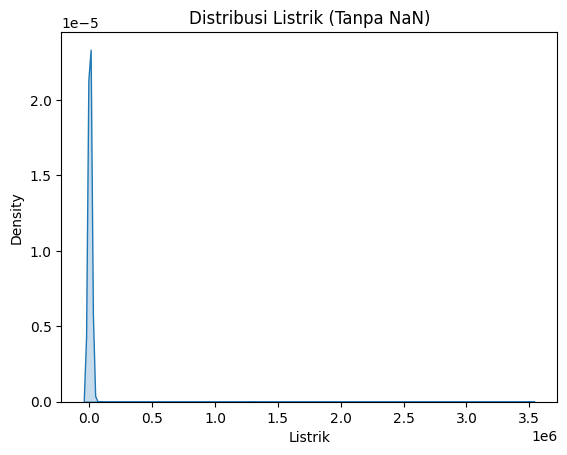

In [ ]:
# Membuat KDE plot
# Menghapus nilai-nilai NaN dari kolom 'Listrik'
listrik_cleaned = df['Listrik'].dropna()

# Mengonversi kolom 'Listrik' ke tipe data numerik (jika belum numerik)
listrik_cleaned = pd.to_numeric(listrik_cleaned, errors='coerce')

# Membuat KDE plot
sns.kdeplot(listrik_cleaned, fill=True)  # Perhatikan penggunaan fill=True
plt.xlabel('Listrik')
plt.ylabel('Density')
plt.title('Distribusi Listrik (Tanpa NaN)')
plt.show()

Data kolom `Listrik` memiliki tingkat skewness yang sangat tinggi, maka imputasi *missing values* akan menggunakan median.

In [ ]:
# Mengonversi kolom 'Listrik' ke tipe data numerik (jika belum numerik)
df['Listrik'] = pd.to_numeric(df['Listrik'], errors='coerce')

# Mengisi nilai NaN dalam kolom 'Listrik' dengan median
median_listrik = np.nanmedian(df['Listrik'])
df['Listrik'].fillna(median_listrik, inplace=True)

# Tampilkan DataFrame setelah pengisian nilai NaN
print(df['Listrik'])

0       1300.0
1       2200.0
2       2200.0
3       2200.0
4       2200.0
         ...  
3050    2200.0
3051    3500.0
3052    1300.0
3053     900.0
3054    2200.0
Name: Listrik, Length: 3010, dtype: float64


In [ ]:
#mengecek missing values
df.isnull().sum()

Created_at    0
LT            0
LB            0
KT            0
KM            0
Garasi        0
Carport       0
Lokasi        0
Sertifikat    0
Listrik       0
Harga         0
URL           1
Deskripsi     0
Wilayah       0
dtype: int64

## Mengoreksi Nilai Variabel

### Mengoreksi Nilai pada Variabel `Sertifikat`

Akan dilihat nilia-nilai *uniques* pada kolom `Sertifikat`.

In [ ]:
df['Sertifikat'].unique().tolist()

['SHM',
 'SHGB',
 'Lainnya',
 'HGB',
 'SHBG',
 'Tidak ada',
 'SHM & IMB',
 'Lainnya (PPJB,Girik,Adat,dll)',
 'HJB',
 'PPJB',
 'lainnya(PPJB, GIRIK, ADAT, dll)',
 'SHM + IMB',
 'SHM + IMB + PBB',
 'SHM + Hak Pakai',
 'AJB',
 'SHM,IMB',
 'SHM - IMB',
 'PPJB,Girik,Adat,dll',
 'SPPJB',
 'HP',
 'SHM ',
 'SMB ',
 '-']

*Terdapat* beberapa nilai dengan maksud yang sama dengan nama yang berbeda pada kolom `Sertifikat`. Maka, kami akan menyamakan nama-nama nilai di kolom `Sertifikat` yang memiliki maksud yang sama.



Kami akan mengecek banyaknya *records* yang berisi HJB, AJB, SMB, dan HP karena keempat sertifikat tersebut cukup asing.

In [ ]:
print("Banyak Sertifikat HJB: " + str((df['Sertifikat'] == 'HJB').sum()))
print("Banyak Sertifikat AJB: " + str((df['Sertifikat'] == 'AJB').sum()))
print("Banyak Sertifikat SMB: " + str((df['Sertifikat'] == 'SMB ').sum()))
print("Banyak Sertifikat HP: " + str((df['Sertifikat'] == 'HP').sum()))

Banyak Sertifikat HJB: 1
Banyak Sertifikat AJB: 1
Banyak Sertifikat SMB: 1
Banyak Sertifikat HP: 3


Karena berjumlah sedikit, maka keempat variabel tersebut akan masuk ke dalam tipe Lainnya.

In [ ]:
df['Sertifikat'].replace({'HGB': 'SHGB',
                          'SHBG': 'SHGB',
                          'lainnya(PPJB, GIRIK, ADAT, dll)': 'Lainnya',
                          'Lainnya (PPJB,Girik,Adat,dll)': 'Lainnya',
                          'SHM & IMB': 'SHM + IMB',
                          'SHM,IMB': 'SHM & IMB',
                          'SHM - IMB': 'SHM & IMB',
                          'Lainnya (PPJB, Girik, Adat, dll)': 'Lainnya',
                          'PPJB,Girik,Adat,dll': 'Lainnya',
                          'SPPJB': 'Lainnya',
                          'PPJB': 'Lainnya',
                          'SHM ': 'SHM',
                          'HJB': 'Lainnya',
                          'AJB': 'Lainnya',
                          'SMB ': 'Lainnya',
                          'HP' : 'Lainnya',
                          '-': 'Tidak ada'}, inplace=True)

In [ ]:
df['Sertifikat'].unique().tolist()

['SHM',
 'SHGB',
 'Lainnya',
 'Tidak ada',
 'SHM + IMB',
 'SHM + IMB + PBB',
 'SHM + Hak Pakai',
 'SHM & IMB']

### Mengoreksi Nilai pada Variabel `Harga`

Akan dilihat nilia-nilai *uniques* pada kolom `Harga`.

In [ ]:
df['Harga'].unique().tolist()

[692550000,
 811400000,
 900500000,
 1001900000,
 1200800000,
 1538200000,
 1946600000,
 1230000000,
 617000000,
 500000000,
 250000000,
 679000000,
 1800000000,
 850000000,
 1350000000,
 1000000000,
 450000000,
 800000000,
 593000000,
 671000000,
 467600000,
 200000000,
 310000000,
 820000000,
 599000000,
 9900000000,
 7300000000,
 891500000,
 420000000,
 241000000,
 390000000,
 379000000,
 2900000000,
 15000000000,
 600000000,
 3700000000,
 460000000,
 880000000,
 2100000000,
 760000000,
 3200000000,
 574600000,
 916000000,
 810000000,
 3128000000,
 2536000000,
 750000000,
 2975000000,
 350000000,
 670000000,
 2128000000,
 130000000,
 1250000000,
 1450000000,
 1500000000,
 1850000000,
 840950000,
 399000000,
 456000000,
 397223000,
 551834000,
 485000000,
 715000000,
 378990000,
 368000000,
 925045000,
 1621400000,
 488500000,
 795000000,
 221000000,
 239999999,
 205000000,
 1400000000,
 650000000,
 2500000000,
 633150000,
 550000000,
 377684362,
 4500000000,
 418000000,
 325000000,


Tidak semua nilai berisi angka numerik tanpa titik, bahkan ada yang disertai dengan mata uang. Dengan demikian, penulisan nilai akan diseragamkan, yaitu numerik tanpa titik.

In [ ]:
df['Harga'] = df['Harga'].astype(str) # menjadikan tipe string

In [ ]:
df['Harga'].replace(r"RP\.", '', regex=True, inplace=True) #menghapus RP.
df['Harga'].replace(r"rp\.", '', regex=True, inplace=True) #menghapus rp.
df['Harga'].replace(r"Rp\.", '', regex=True, inplace=True) #menghapus Rp.
df['Harga'].replace(r"Rp", '', regex=True, inplace=True) #menghapus RP
df['Harga'].replace(r" ", '', regex=True, inplace=True) #menghapus spasi
df['Harga'].replace(r'\.0$', '', regex=True, inplace=True) #menghapus .0 di belakang kata

In [ ]:
df['Harga'] = df['Harga'].str.replace(".", '') # menghapus .
df['Harga'] = df['Harga'].str.strip("'") # menghapus '

<ipython-input-61-160543f3d88f>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Harga'] = df['Harga'].str.replace(".", '') # menghapus .


Akan dilihat kembali nilai *uniques* pada kolom `Harga`.

In [ ]:
df['Harga'].unique().tolist()

['692550000',
 '811400000',
 '900500000',
 '1001900000',
 '1200800000',
 '1538200000',
 '1946600000',
 '1230000000',
 '617000000',
 '500000000',
 '250000000',
 '679000000',
 '1800000000',
 '850000000',
 '1350000000',
 '1000000000',
 '450000000',
 '800000000',
 '593000000',
 '671000000',
 '467600000',
 '200000000',
 '310000000',
 '820000000',
 '599000000',
 '9900000000',
 '7300000000',
 '891500000',
 '420000000',
 '241000000',
 '390000000',
 '379000000',
 '2900000000',
 '15000000000',
 '600000000',
 '3700000000',
 '460000000',
 '880000000',
 '2100000000',
 '760000000',
 '3200000000',
 '574600000',
 '916000000',
 '810000000',
 '3128000000',
 '2536000000',
 '750000000',
 '2975000000',
 '350000000',
 '670000000',
 '2128000000',
 '130000000',
 '1250000000',
 '1450000000',
 '1500000000',
 '1850000000',
 '840950000',
 '399000000',
 '456000000',
 '397223000',
 '551834000',
 '485000000',
 '715000000',
 '378990000',
 '368000000',
 '925045000',
 '1621400000',
 '488500000',
 '795000000',
 '2210000

Nilai-nilainya sudah dituliskan dengan cara yang seragam.

## Transform Data Types

In [ ]:
perubahan ={"LT": int,
            "LB": int,
            "KT": int,
            "KM": int,
            "Garasi": int,
            "Carport": int,
            "Lokasi": "category",
            "Sertifikat": "category",
            "Listrik": int,
            "Harga" : int,
            "URL": "category",
            "Deskripsi": "category",
            "Wilayah": "category"}

df = df.astype(perubahan)
print(df.dtypes)

Created_at      object
LT               int64
LB               int64
KT               int64
KM               int64
Garasi           int64
Carport          int64
Lokasi        category
Sertifikat    category
Listrik          int64
Harga            int64
URL           category
Deskripsi     category
Wilayah       category
dtype: object


In [ ]:
# Mencoba mengonversi kolom 'Created_at' satu per satu
for index, value in enumerate(df['Created_at']):
    try:
        pd.to_datetime(value)
    except ValueError as e:
        print(f"Error at index {index}: {e}")

<ipython-input-64-e633cd1f329e>:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  pd.to_datetime(value)


Error at index 2249: Out of bounds nanosecond timestamp: 203-09-20 00:00:00 present at position 0


In [ ]:
# Find the index where the value needs to be changed
indeks_yang_akan_diubah = df[df['Created_at'] == '20-09-203'].index

# Check if the index exists
if not indeks_yang_akan_diubah.empty:
    # Set the value at the index found
    nilai_baru = '20-09-2023'
    df.loc[indeks_yang_akan_diubah[0], 'Created_at'] = nilai_baru

In [ ]:
df['Created_at'] = pd.to_datetime(df['Created_at'], errors='coerce')
print(df['Created_at'])
print(df.dtypes)

0      2021-03-12
1      2021-06-12
2      2021-06-12
3      2021-06-12
4      2021-06-12
          ...    
3050   2023-09-19
3051   2023-09-18
3052   2023-09-17
3053   2023-09-14
3054   2023-07-17
Name: Created_at, Length: 3010, dtype: datetime64[ns]
Created_at    datetime64[ns]
LT                     int64
LB                     int64
KT                     int64
KM                     int64
Garasi                 int64
Carport                int64
Lokasi              category
Sertifikat          category
Listrik                int64
Harga                  int64
URL                 category
Deskripsi           category
Wilayah             category
dtype: object


<ipython-input-66-8f236b8370df>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Created_at'] = pd.to_datetime(df['Created_at'], errors='coerce')


Sehingga diperoleh tipe data yang diinginkan.

## Outlier dan Noise

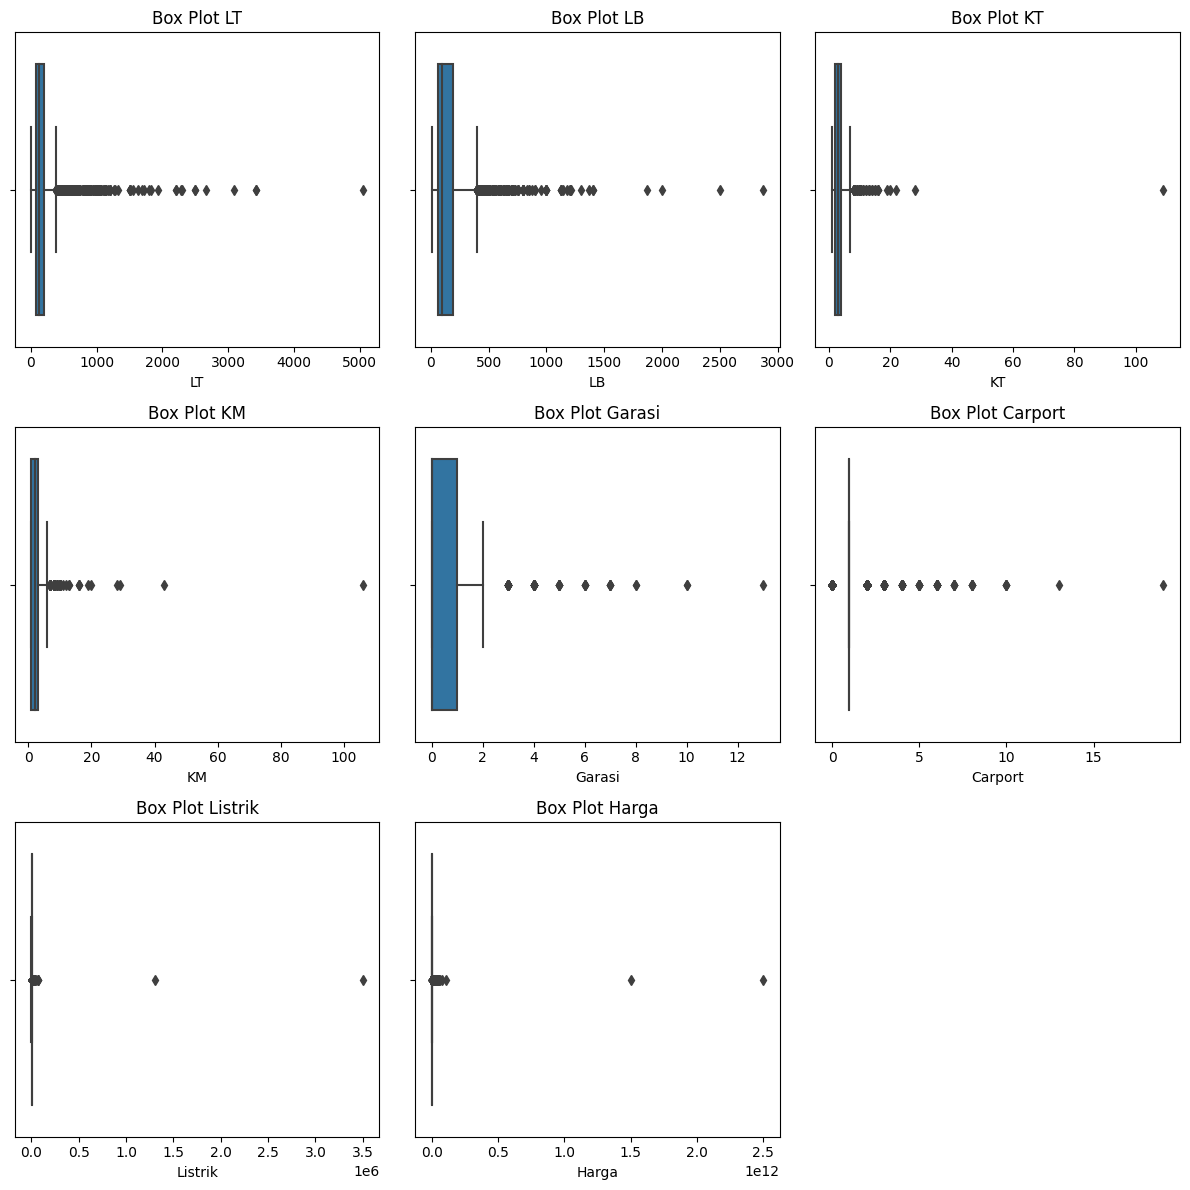

In [ ]:
# Mengambil kolom numerik
numeric_columns = df.select_dtypes(include='number').columns

# Menentukan jumlah kolom dalam satu baris
columns_per_row = 3

# Menghitung jumlah baris subplot yang diperlukan
num_rows = len(numeric_columns) // columns_per_row + (len(numeric_columns) % columns_per_row > 0)

# Membuat subplot dalam satu baris
fig, axes = plt.subplots(num_rows, columns_per_row, figsize=(12, 4 * num_rows))

# Loop melalui kolom numerik dan membuat box plot dalam subplot
for i, numeric_column in enumerate(numeric_columns):
    row = i // columns_per_row
    col = i % columns_per_row
    ax = axes[row, col]

    sns.boxplot(x=df[numeric_column], ax=ax)
    ax.set_title(f'Box Plot {numeric_column}')

# Menyembunyikan subplot yang tidak terpakai
for i in range(len(numeric_columns), num_rows * columns_per_row):
    row = i // columns_per_row
    col = i % columns_per_row
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()

Dari grafik di atas, terlihat bahwa ada outlier. Akan dicari outlier tersebut.

In [ ]:
df[df['Listrik'].isin(df['Listrik'].nlargest(2))]

,Created_at,LT,LB,KT,KM,Garasi,Carport,Lokasi,Sertifikat,Listrik,Harga,URL,Deskripsi,Wilayah
325,2021-09-22,108,70,3,2,1,1,"Jalan Merbau Kecapi, Tanjung Gading, Bandar La...",SHM,1300000,525000000,https://rumahdijual.com/lampung/10102766-rumah...,"Bebas banjir, sumber air sumur bor, ada koneks...",Lampung-Sumatera Selatan
342,2021-08-28,549,246,4,3,1,1,"Musi Banyuasin, Sekayu",SHM + IMB,3500000,1500000000,https://www.iklanrumah.com/list/detail/31594/d...,"Fasilitas lengkap, keamanan terjamin, sumber a...",Lampung-Sumatera Selatan


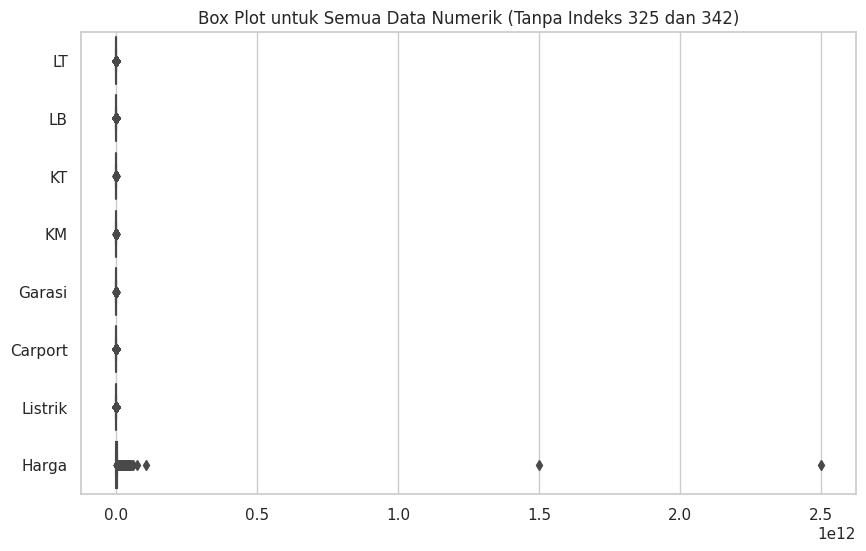

In [ ]:
# Membuat box plot untuk semua kolom numerik dalam DataFrame yang sudah difilter
sns.set(style="whitegrid")  # Memilih gaya plot
plt.figure(figsize=(10, 6))  # Ukuran plot

# Membuat box plot untuk semua kolom numerik dalam DataFrame yang sudah difilter
sns.boxplot(data=df.drop([325, 342]), orient="h")  # orient="h" untuk membuat box plot horizontal

plt.title("Box Plot untuk Semua Data Numerik (Tanpa Indeks 325 dan 342)")
plt.show()

### Penanganan outlier pada variabel `Listrik`

Karena dilihat ada nilai tidak wajar pada daya listrik di atas 60.000 VA, maka akan kami telusuri satu-satu

In [ ]:
print(df[df['Listrik'] > 60000])

     Created_at    LT    LB  KT  KM  Garasi  Carport  \
325  2021-09-22   108    70   3   2       1        1   
342  2021-08-28   549   246   4   3       1        1   
1202 2021-12-06  3087  2500   5   5      10       10   
1337 2021-12-07   700  2000  10  10       0       10   
2094 2023-08-23  1071  1300   5   5       4        3   

                                                 Lokasi Sertifikat  Listrik  \
325   Jalan Merbau Kecapi, Tanjung Gading, Bandar La...        SHM  1300000   
342                              Musi Banyuasin, Sekayu  SHM + IMB  3500000   
1202                          BSD BUKIT GOLF, TANGERANG  Tidak ada    66000   
1337                                      Jakarta Pusat        SHM    66000   
2094                                               Dago        SHM    66000   

             Harga                                                URL  \
325      525000000  https://rumahdijual.com/lampung/10102766-rumah...   
342     1500000000  https://www.iklanrumah

Karena nilai maksimum daya sebuah rumah hanya sampai 630.000 VA, maka tidak masuk akal jika listriknya menyentuh angka jutaan. Oleh karena itu, akan kami ubah dengan menghilangkan tiga angka 0 untuk daya listrik jutaan. Untuk listrik dengan daya 66.000, kami asumsikan benar karena memang terdapat daya listrik 66.000 VA, sehingga angka tersebut akan kami abaikan.

In [ ]:
df['Listrik'].replace({1300000 : 1300,
                       3500000 : 3500}, inplace = True)
print(df[df['Listrik'] > 60000])

     Created_at    LT    LB  KT  KM  Garasi  Carport  \
1202 2021-12-06  3087  2500   5   5      10       10   
1337 2021-12-07   700  2000  10  10       0       10   
2094 2023-08-23  1071  1300   5   5       4        3   

                         Lokasi Sertifikat  Listrik         Harga  \
1202  BSD BUKIT GOLF, TANGERANG  Tidak ada    66000        100000   
1337              Jakarta Pusat        SHM    66000  105000000000   
2094                       Dago        SHM    66000   50000000000   

                                                    URL  \
1202  https://www.rumah123.com/properti/tangerang/ho...   
1337  https://www.rumah.com/listing-properti/dijual-...   
2094  https://www.rumah.com/listing-properti/dijual-...   

                                              Deskripsi    Wilayah  
1202  Rumah Super Mewah Bukit Golf BSD City rumah me...  Tangerang  
1337  - 2 menit ke Grand Indonesia (500 meter)\n- 5 ...    Jakarta  
2094  Jl. Kyai Gede Utama, sayao Dago - Bandung\nDij..

### Penanganan outlier pada variabel `Harga`

In [ ]:
df[df['Harga'] < 1000]

,Created_at,LT,LB,KT,KM,Garasi,Carport,Lokasi,Sertifikat,Listrik,Harga,URL,Deskripsi,Wilayah
895,2021-06-12,50,45,2,1,0,0,Cipayung,SHM,1300,250,https://www.rumah123.com/properti/depok/hos928...,rumah minimalis termurah di citayam,Depok
896,2021-06-12,50,36,2,1,0,1,Sawangan,SHM,1300,250,https://www.rumah123.com/properti/depok/hos928...,CLUSTER TERMURAH DI SAWANGAN KOTA DEPOK,Depok
897,2021-06-12,50,45,2,1,0,0,Cimanggis,SHM,1300,250,https://www.rumah123.com/properti/depok/hos928...,RUMAH SIAP HUNI HARGA NEGO DEKAT STASIUN CITAYAM,Depok
898,2021-06-12,72,45,2,1,0,1,Sawangan,SHM,1300,350,https://www.rumah123.com/properti/depok/hos928...,Rumah Cluster Siap Huni Depok,Depok
899,2021-06-12,40,30,2,1,0,0,Cipayung,SHM,1300,130,https://www.rumah123.com/properti/depok/hos928...,Promo akhir tahun rumah cantik dijual murah mu...,Depok
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1870,2023-06-07,36,98,2,1,0,2,"Padang Kota, Padang",SHM,1300,385,https://www.rumah123.com/properti/padang/hos13...,JUAL RUMAH MURAH DI TABING PADANG DEKAT MALL B...,Padang-Palembang
1880,2023-09-13,104,73,3,2,0,1,"Sako, Palembang",SHM,2200,750,https://www.rumah123.com/properti/palembang/ho...,Town House ala eropa dengan model scandanavian...,Padang-Palembang
1881,2023-08-09,121,60,2,1,0,1,"Sako, Palembang",SHM,2200,669,https://www.rumah123.com/properti/palembang/ho...,Rumah Lokasi Sangat Strategis di Jalan Sako Ba...,Padang-Palembang
1882,2023-04-30,152,86,2,1,0,1,"Sako, Palembang",SHM,3500,599,https://www.rumah123.com/properti/palembang/ho...,Rumah Dijual Palembang Dijual Rumah Minimalis ...,Padang-Palembang


Karena terdapat 197 nilai Harga di bawah 1000 yang mana tidak mungkin, maka akan kami asumsikan nilai tersebut merupakan bilangan jutaan. Sehingga kami tambahkan 6 nilai 0 di belakang angka-angka tersebut.

In [ ]:
df['Harga'] = np.where(df['Harga'] < 1000,
                       df['Harga'] * 1000000,
                       df['Harga'])
print(df[df['Harga'] < 1000])

Empty DataFrame
Columns: [Created_at, LT, LB, KT, KM, Garasi, Carport, Lokasi, Sertifikat, Listrik, Harga, URL, Deskripsi, Wilayah]
Index: []


In [ ]:
df[df['Harga'] < 10000000].sort_values(by = ['Harga']) # ngeliat data di bawah 10jt

,Created_at,LT,LB,KT,KM,Garasi,Carport,Lokasi,Sertifikat,Listrik,Harga,URL,Deskripsi,Wilayah
1210,2021-12-07,155,100,3,2,0,1,"BSD, TANGERANG",SHM,2200,1000,https://www.rumah123.com/properti/tangerang/ho...,Dekat dengan berbagai fasilitas seperti : Seko...,Tangerang
1855,2023-09-20,240,90,3,2,0,0,"Taman Kenten, Palembang",SHM,2200,1000,https://www.rumah.com/listing-properti/dijual-...,"Rumah Idaman di Taman Kenten, Palembang Harga ...",Padang-Palembang
1000,2021-04-12,83,100,3,2,0,2,Sawangan,SHM,2200,1000,https://www.rumah123.com/properti/depok/hos928...,Rumah Second Masih Bagus Semi Furnish dekat Pi...,Depok
1225,2021-12-08,91,91,3,2,0,0,"Poris, Tangerang",SHM,3500,1000,https://www.rumah123.com/properti/tangerang/ho...,Akses Mudah: 10 Menit Ke stasiun kereta poris ...,Tangerang
1008,2021-04-12,72,45,2,1,0,1,Cimanggis,SHM,2200,1000,https://www.rumah123.com/properti/depok/hos928...,PERUMAHAN NUANSA PERMAI DEPOK,Depok
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1168,2021-12-06,276,441,4,4,0,0,"BSD FORESTA, TANGERANG",SHM,2200,14000,https://www.rumah123.com/properti/tangerang/ho...,LAUREL NAVA PARK by HONGKONG LAND & SINARMAS L...,Tangerang
1151,2021-12-06,534,1000,8,8,6,6,"BSD, TANGERANG",SHM,16500,15500,https://www.rumah123.com/properti/tangerang/ho...,Dijual rumah brand new TAMAN TIRTA GOLF BSD\nL...,Tangerang
1134,2021-12-06,534,1000,5,6,6,2,"BSD, TANGERANG",SHM,16500,15500,https://www.rumah123.com/properti/tangerang/ho...,"New Home\nRUMAH MEWAH TAMAN TIRTA GOLF BSD, Lt...",Tangerang
1776,2021-11-22,1632,1365,13,13,0,0,Palembang,SHM,33000,20000,https://www.rumah123.com/properti/palembang/ho...,"Rumah Dijual Palembang COCOK UNTUK: HOSTEL, KO...",Padang-Palembang


Karena terdapat 254 nilai Harga di bawah 10 Juta yang mana kemungkinan tersebut kecil, maka akan kami asumsikan nilai tersebut dalam ratusan ribu. Sehingga kami tambahkan 5 nilai 0 di belakang angka-angka tersebut.

In [ ]:
df['Harga'] = np.where(df['Harga'] < 10000000,
                       df['Harga'] * 100000,
                       df['Harga'])
print(df[df['Harga'] < 10000000])

Empty DataFrame
Columns: [Created_at, LT, LB, KT, KM, Garasi, Carport, Lokasi, Sertifikat, Listrik, Harga, URL, Deskripsi, Wilayah]
Index: []


In [ ]:
df[df['Harga'] > 100000000000].sort_values(by = ['Harga'])

,Created_at,LT,LB,KT,KM,Garasi,Carport,Lokasi,Sertifikat,Listrik,Harga,URL,Deskripsi,Wilayah
1337,2021-12-07,700,2000,10,10,0,10,Jakarta Pusat,SHM,66000,105000000000,https://www.rumah.com/listing-properti/dijual-...,- 2 menit ke Grand Indonesia (500 meter)\n- 5 ...,Jakarta
2104,2021-06-12,145,126,3,3,0,1,Medan Johor,SHM,2200,1500000000000,https://www.rumah.com/listing-properti/dijual-...,Rumah berkualitas samera,Medan
2889,2023-08-07,250,436,5,3,0,0,Semarapura,SHM,6600,2500000000000,https://www.rumah123.com/properti/semarapura/h...,"Rumah Dijual Semarapura Ada 2 sertifikat, masi...",Bali


Setelah kami telusuri, terdapat 3 nilai harga di atas 100M yang kami kategorikan sebagai outlier, dengan rincian 105M, 1,5T, dan 2,5T. Berdasarkan riset kami, harga tanah/bangunan/rumah tertinggi adalah 1,3T. Yang mana untuk harga 1,5T dan 2,5T menjadi tidak mungkin. Oleh karena itu, kami menelusuri URL dari ketiga rumah tersebut dan didapatkan hasil bahwa :

1. untuk rumah 2,5T terdapat kekeliruan penginputan sehingga kami revisi.
2. untuk rumah 1,5T tidak ditemukan web berdasarkan URL sehingga kami akan hapus baris tersebut karena data tidak dapat dipertanggungjawabkan.
3. untuk rumah 105M akan kami abaikan karena beberapa alasan, seperti lokasi strategis, besar luas rumah, dan lain-lain.

In [ ]:
df['Harga'].replace({2500000000000 : 2500000000}, inplace = True)
df = df.drop(df[df['Harga'] == 1500000000000].index)
print(df[df['Harga'] > 100000000000])

     Created_at   LT    LB  KT  KM  Garasi  Carport         Lokasi Sertifikat  \
1337 2021-12-07  700  2000  10  10       0       10  Jakarta Pusat        SHM   

      Listrik         Harga  \
1337    66000  105000000000   

                                                    URL  \
1337  https://www.rumah.com/listing-properti/dijual-...   

                                              Deskripsi  Wilayah  
1337  - 2 menit ke Grand Indonesia (500 meter)\n- 5 ...  Jakarta  


### Penanganan Outlier pada variabel `KT`dan `KM`

In [ ]:
df[df['KT'] > 40]

,Created_at,LT,LB,KT,KM,Garasi,Carport,Lokasi,Sertifikat,Listrik,Harga,URL,Deskripsi,Wilayah
298,2021-05-12,1716,1871,109,106,0,0,"Rajabasa, Bandar Lampung",SHM,2200,11000000000,https://rumahdijual.com/lampung/9635319-kost-m...,FASILITAS KAMAR:\n1. Kmr lebih Besar 4x4 dg Sp...,Lampung-Sumatera Selatan


In [ ]:
df[df['KM'] > 40]

,Created_at,LT,LB,KT,KM,Garasi,Carport,Lokasi,Sertifikat,Listrik,Harga,URL,Deskripsi,Wilayah
298,2021-05-12,1716,1871,109,106,0,0,"Rajabasa, Bandar Lampung",SHM,2200,11000000000,https://rumahdijual.com/lampung/9635319-kost-m...,FASILITAS KAMAR:\n1. Kmr lebih Besar 4x4 dg Sp...,Lampung-Sumatera Selatan
2093,2023-05-09,200,250,4,43,1,1,Mekar Wangi,SHM,2200,3250000000,https://www.rumah.com/listing-properti/dijual-...,Rumah Hunian Di Komplek Singgasana Pradana Ban...,Bandung


Setelah kami telusuri pada data dengan KT dan KM diatas 40, untuk data dengan index 2093 dengan 4 KT dan 43 KM terdapat kesalahan penginputan sehingga akan kami revisi. Sedangkan untuk data dengan index 298 dengan 109 KT dan 106 KM akan kami abaikan karena properti tersebut memang ditujukan untuk indekos sehingga wajar.

In [ ]:
df['KM'].replace({43 : 3}, inplace = True)
df[df['KM'] > 40]

,Created_at,LT,LB,KT,KM,Garasi,Carport,Lokasi,Sertifikat,Listrik,Harga,URL,Deskripsi,Wilayah
298,2021-05-12,1716,1871,109,106,0,0,"Rajabasa, Bandar Lampung",SHM,2200,11000000000,https://rumahdijual.com/lampung/9635319-kost-m...,FASILITAS KAMAR:\n1. Kmr lebih Besar 4x4 dg Sp...,Lampung-Sumatera Selatan


Sehingga outlier pada setiap variabel sudah teratasi.

# **Visualisasi dan Interpretasi Data**

###Kecenderungan Harga Rumah Berdasarkan Wilayah

<Figure size 1200x600 with 0 Axes>

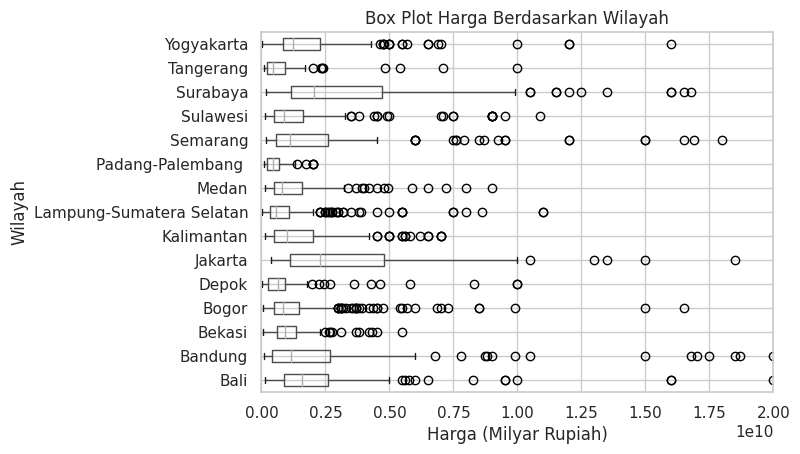

In [ ]:
# Membuat boxplot harga rumah berdasarkan wilayah
plt.figure(figsize=(12,6))
boxplot = df.boxplot(column='Harga', by='Wilayah', vert=False)
plt.title('Box Plot Harga Berdasarkan Wilayah')
plt.suptitle('')
plt.ylabel('Wilayah')
plt.xlabel('Harga (Milyar Rupiah)')
plt.xlim(0, 20000000000)
plt.grid(True)

# Show the plot
plt.show()

Dari visualisasi tersebut, dapat dilihat bahwa 3 kota dengan median harga rumah tertinggi antara lain:


1.   Jakarta
2.   Surabaya
3.   Bali

Sementara, 3 kota dengan median rumah terendah antara lain:

1.   Padang-Palembang
2.   Tangerang
3.   Depok

Dapat dilihat bahwa kota-kota dengan median harga rumah tertinggi memiliki range antara kuartil ke-3 dan kuartil ke-1 yang cukup tinggi dibandingkan dengan kota-kota dengan median harga terendah. Hal ini menunjukkan bahwa dalam kota-kota seperti Jakarta, Surabaya, dan Bali, harus dilakukan analisis lebih lanjut jenis properti apa yang memiliki harga yang rendah maupun tinggi. Dapat dianalisis pula lebih lanjut lokasi-lokasi mana dalam wilayah tersebut yang cenderung memiliki properti dengan harga yang rendah maupun tinggi.

In [ ]:
#Mencari tahu median dari harga rumah
median_harga = df['Harga'].median()
print(f"Median dari harga rumah di seluruh wilayah adalah: {median_harga}")

Median dari harga rumah di seluruh wilayah adalah: 900000000.0


###Kualitas Data yang dimiliki Perusahaan dan Saran Perbaikan Data

Setelah melakukan analisis terhadap data yang tersedia serta melakukan *benchmarking* dengan perusahaan property lainnya seperti Zillow dan Airbnb, kami menyarankan beberapa hal berikut:


*   RPPI dapat melakukan **augmentasi data dengan informasi relevan lainnya**, seperti; jarak properti ke sekolah, rumah sakit, transportasi umum, dan pusat perbelanjaan; demografi masyarakat di daerah tersebut; kondisi cuaca di daerah tersebut; serta tingkat kriminalitas. Faktor-faktor ini mempengaruhi harga dan tingkat penjualan dari sebuah properti.
*   Karena telah beroperasi selama 11 tahun, RPPI dapat **memanfaatkan data penjualan rumah dari tahun-tahun sebelumnya**. Data historik dapat mengungkapkan pola seasonal dan trend penjualan yang dapat membantu membuat keputusan untuk alokasi investasi.
*   Pada database, tidak tersedia informasi apakah sebuah properti sudah atau belum terjual. Kita hanya dapat mengetahui karakteristik dari properti-properti yang sedang dijual. RPPI dapat melakukan **update data dari properti-properti sebelumnya apabila sudah terjual atau belum**. RPPI juga dapat menambahkan mekanisme untuk **menghitung seberapa lama sebuah property *has been listed on the market***. Data ini dapat memberikan insight terhadap *real estate market health* dan *buyer’s interest* dari daerah tersebut.



###Rekomendasi Kota atau Wilayah Untuk Membuka Kantor Cabang RPPI

Dalam membuka kantor cabang RPPI, kami menetapkan bahwa kota atau wilayah yang dijadikan rekomendasi adalah wilayah yang memiliki rata-rata karakteristik rumah yang dijual pada wilayah tersebut adalah yang paling similar/sama dengan rata-rata karakteristik rumah yang dijual secara keseluruhan di setiap wilayah.

Diasumsikan bahwa rata-rata karakteristik rumah yang paling banyak dijual adalah yang paling *common* untuk orang beli, sehingga dibutuhkan kantor cabang RPPI di wilayah tersebut untuk menjawab peluang pasar penjualan terbesar.

In [ ]:
daftar_wilayah_rec = ['Bogor','Lampung-Sumatera Selatan','Semarang','Kalimantan','Depok','Tangerang','Jakarta',
          'Bekasi','Padang-Palembang ','Bandung','Medan','Surabaya','Yogyakarta','Bali','Sulawesi']

df_rec = pd.DataFrame()
for i in daftar_wilayah_rec:
  df_com = pd.DataFrame([[df['LT'][df['Wilayah'] == i].median(),
              df['LB'][df['Wilayah'] == i].median(),
              df['KT'][df['Wilayah'] == i].mode()[0],
              df['KM'][df['Wilayah'] == i].mode()[0],
              df['Garasi'][df['Wilayah'] == i].mode()[0],
              df['Carport'][df['Wilayah'] == i].mode()[0],
              df['Listrik'][df['Wilayah'] == i].median(),
              df['Harga'][df['Wilayah'] == i].median(),
              df['Sertifikat'][df['Wilayah'] == i].mode()[0],
              i]])
  df_rec = pd.concat([df_com, df_rec], axis=0, ignore_index=True)

df_rec = df_rec.rename(columns={0: "LT", 1: "LB", 2: "KT", 3: "KM",
                                4: "Garasi", 5: "Carport", 6: "Listrik",
                                7: "Harga", 8: "Sertifikat", 9: "Wilayah"})
df_rec

,LT,LB,KT,KM,Garasi,Carport,Listrik,Harga,Sertifikat,Wilayah
0,120.0,100.0,2,1,0,1,2200.0,8.975000e+08,SHM,Sulawesi
1,116.0,120.0,3,2,0,1,2200.0,1.600000e+09,SHM,Bali
2,128.0,120.0,3,2,0,1,2200.0,1.250000e+09,SHM,Yogyakarta
3,144.0,180.0,4,2,0,1,2200.0,2.050000e+09,SHM,Surabaya
4,96.0,98.0,3,2,0,1,2200.0,8.000000e+08,SHM,Medan
5,104.0,100.0,2,2,0,1,2200.0,1.175000e+09,SHM,Bandung
6,150.0,120.0,2,2,0,0,2200.0,4.350000e+08,SHM,Padang-Palembang
7,90.5,84.0,2,2,0,1,2200.0,9.100000e+08,SHM,Bekasi
8,93.0,134.0,3,2,0,1,2200.0,2.288809e+09,SHM,Jakarta
9,118.0,110.0,3,2,0,1,2200.0,4.500000e+08,SHM,Tangerang


In [ ]:
df_commonal = pd.DataFrame([[df['LT'].median(),
              df['LB'].median(),
              df['KT'].mode()[0],
              df['KM'].mode()[0],
              df['Garasi'].mode()[0],
              df['Carport'].mode()[0],
              df['Listrik'].median(),
              df['Harga'].median(),
              df['Sertifikat'].mode()[0],
              'Rata-Rata']])

df_commonal = df_commonal.rename(columns={0: "LT", 1: "LB", 2: "KT", 3: "KM",
                                4: "Garasi", 5: "Carport", 6: "Listrik",
                                7: "Harga", 8: "Sertifikat", 9: "Wilayah"})
df_commonal

,LT,LB,KT,KM,Garasi,Carport,Listrik,Harga,Sertifikat,Wilayah
0,119.0,100.0,2,2,0,1,2200.0,900000000.0,SHM,Rata-Rata


Kami membuat 2 data yang akan digabung untuk melihat tingkat kesamaan kedua data:

*   Data df_rec merupakan data rata-rata karakteristik rumah yang dijual di masing-masing wilayah.
*   Data df_commonal merupakan data rata-rata karakteristik rumah yang dijual di setiap wilayah secara keseluruhan.

Kami menggunakan median untuk menghitung rata-rata variabel LT, LB, Listrik, dan Harga karena terdapat beberapa values yang terlalu tinggi yang dapat mengganggu perhitungan rata-rata (apabila dengan mean). Sedangkan untuk menghitung rata-rata variabel KT, KM, Garasi, Carport, dan Sertifikat kami menggunakan modus (karena nilai berbentuk diskrit dan kategorik) untuk mencari nilai yang paling sering muncul dan dapat dijadikan rata-rata variabel.

In [ ]:
df_rec = pd.concat([df_commonal, df_rec], axis=0, ignore_index=True)

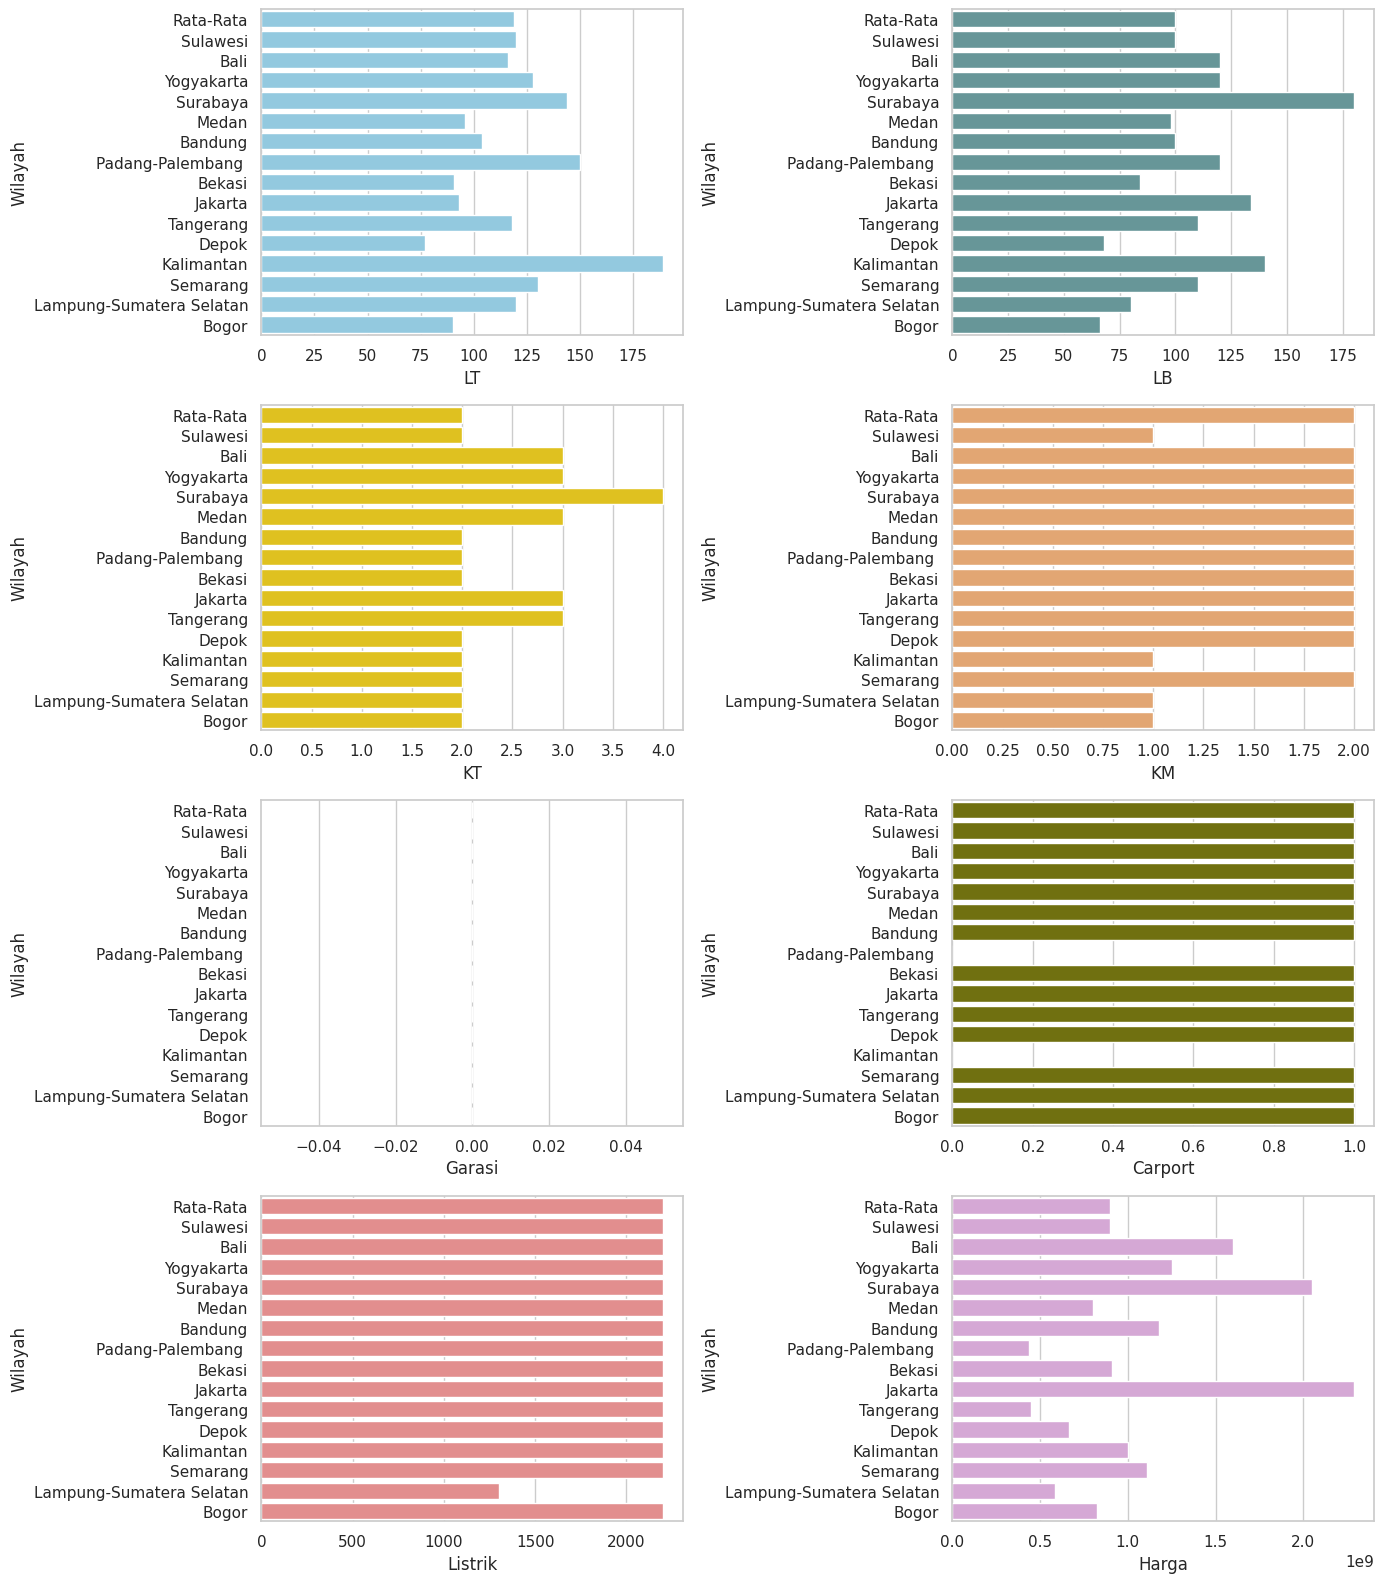

In [ ]:
sns.set(style="whitegrid")
fig,axs = plt.subplots(4,2, figsize = (14,16))
sns.barplot(data = df_rec, x = 'LT', y = 'Wilayah', color="skyblue", ax=axs[0, 0])
sns.barplot(data = df_rec, x = 'LB', y = 'Wilayah', color="cadetblue", ax=axs[0, 1])
sns.barplot(data = df_rec, x = 'KT', y = 'Wilayah', color="gold", ax=axs[1, 0])
sns.barplot(data = df_rec, x = 'KM', y = 'Wilayah', color="sandybrown", ax=axs[1, 1])
sns.barplot(data = df_rec, x = 'Garasi', y = 'Wilayah', color="teal", ax=axs[2, 0])
sns.barplot(data = df_rec, x = 'Carport', y = 'Wilayah', color="olive", ax=axs[2, 1])
sns.barplot(data = df_rec, x = 'Listrik', y = 'Wilayah', color="lightcoral", ax=axs[3, 0])
sns.barplot(data = df_rec, x = 'Harga', y = 'Wilayah', color="plum", ax=axs[3, 1])
fig.tight_layout()

Dari plot berikut dapat dibandingkan rata-rata karakteristik rumah yang dijual di masing-masing wilayah dengan rata-rata karakteristik rumah yang dijual secara keseluruhan.

Diketahui dari tabel sebelumnya bahwa setiap wilayah memiliki rata-rata rumah yang dijual bersertifikat SHM sama seperti rata-rata rumah yang dijual secara keseluruhan. Terlihat dari plot bahwa untuk rata-rata KT, KM, Garasi, Carport, dan Listrik setiap wilayah cenderung sama dengan rata-rata rumah yang dijual secara keseluruhan. Sedangkan untuk rata-rata LT, LB, dan Harga setiap wilayah bervariasi dan memiliki perbedaan dengan rata-rata rumah yang dijual secara keseluruhan.

Untuk menghitung tingkat kesamaan data rata-rata karakteristik rumah yang dijual di masing-masing wilayah dengan rata-rata karakteristik rumah yang dijual secara keseluruhan, akan digunakan konsep perhitungan jarak euclidian. Nilai jarak terkecil yang didapatkan antara kedua data diartikan kedua data tersebut dapat dikatakan memiliki karakteristik yang sama atau mirip.

In [ ]:
df_rec = df_rec.drop(columns=['Sertifikat'])
df_commonal = df_commonal.drop(columns=['Sertifikat'])

In [ ]:
df_commonal = df_commonal.drop(columns=['Wilayah'])

daftar_wilayah_rec = ['Bogor','Lampung-Sumatera Selatan','Semarang','Kalimantan','Depok','Tangerang','Jakarta',
          'Bekasi','Padang-Palembang ','Bandung','Medan','Surabaya','Yogyakarta','Bali','Sulawesi']

for j in daftar_wilayah_rec:
  df_spec = df_rec[df_rec['Wilayah'] == j]
  df_spec = df_spec.drop(columns=['Wilayah'])
  dist_score = euclidean(df_spec.values.flatten(), df_commonal.values.flatten())

  print(j, '=', dist_score)

Bogor = 72800000.00001372
Lampung-Sumatera Selatan = 312500000.00129664
Semarang = 210000000.00000054
Kalimantan = 100000000.00003251
Depok = 235000000.00000593
Tangerang = 450000000.0000001
Jakarta = 1388809000.0000007
Bekasi = 10000000.000053413
Padang-Palembang  = 465000000.0000015
Bandung = 275000000.0000004
Medan = 100000000.00000267
Surabaya = 1150000000.000003
Yogyakarta = 350000000.0000007
Bali = 700000000.0000002
Sulawesi = 2500000.0000004


Terlihat bahwa nilai jarak terkecil yang didapatkan adalah 2500000.0000004 untuk wilayah Sulawesi, artinya rata-rata karakteristik rumah yang dijual di wilayah Sulawesi paling mirip/similar dengan rata-rata karakteristik rumah yang dijual secara keseluruhan.

Maka dari itu, kami memutuskan sesuai dengan asumsi awal bahwa rata-rata karakteristik rumah yang paling banyak dijual adalah yang paling *common* untuk orang beli, sehingga rekomendasi kota atau wilayah untuk pembukaan kantor cabang RPPI adalah Sulawesi.

###Karakteristik Rumah Yang Paling Banyak Dijual

Dalam menentukan karakteristik rumah yang paling banyak dijual, kami akan menganalisis menggunakan plot, serta melakukan perhitungan jumlah rumah dengan menetapkan bahwa karakteristik tersebut akan dilihat dari setiap variabel yaitu LT, LB, KT, KM, Garasi, Carport, Listrik, Harga, dan Sertifikat.

Berbeda dengan analisis yang dilakukan pada bagian rekomendasi kota atau wilayah untuk membuka cabang RPPI sebelumnya. Kami akan mencari secara lebih spesifik karakteristik atau tipe rumah yang paling banyak dijual. Untuk dapat menganalisis karakteristik tersebut, akan dilakukan terlebih dahulu pemisahan nilai yang terlalu tinggi pada data dengan metode z-score, karena nilai tersebut dapat menyebabkan kesalahan perhitungan dan mengganggu plot menjadi tidak terlihat secara jelas.

In [ ]:
def is_outlier(points, thresh=3.5):
    if len(points.shape) == 1:
        points = points[:,None]
    median = np.median(points, axis=0)
    diff = np.sum((points - median)**2, axis=-1)
    diff = np.sqrt(diff)
    med_abs_deviation = np.median(diff)

    modified_z_score = 0.6745 * diff / med_abs_deviation

    return modified_z_score > thresh

df_outlt = df[~is_outlier(df['LT'])]
df_outlb = df[~is_outlier(df['LB'])]
df_outkt = df[~is_outlier(df['KT'])]
df_outkm = df[~is_outlier(df['KM'])]
df_outgar = df[~is_outlier(df['Garasi'])]
df_outcar = df[~is_outlier(df['Carport'])]
df_outlist = df[~is_outlier(df['Listrik'])]
df_outharga = df[~is_outlier(df['Harga'])]

<ipython-input-89-f8bdffdafd24>:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  points = points[:,None]
<ipython-input-89-f8bdffdafd24>:9: RuntimeWarning: divide by zero encountered in divide
  modified_z_score = 0.6745 * diff / med_abs_deviation
<ipython-input-89-f8bdffdafd24>:9: RuntimeWarning: invalid value encountered in divide
  modified_z_score = 0.6745 * diff / med_abs_deviation


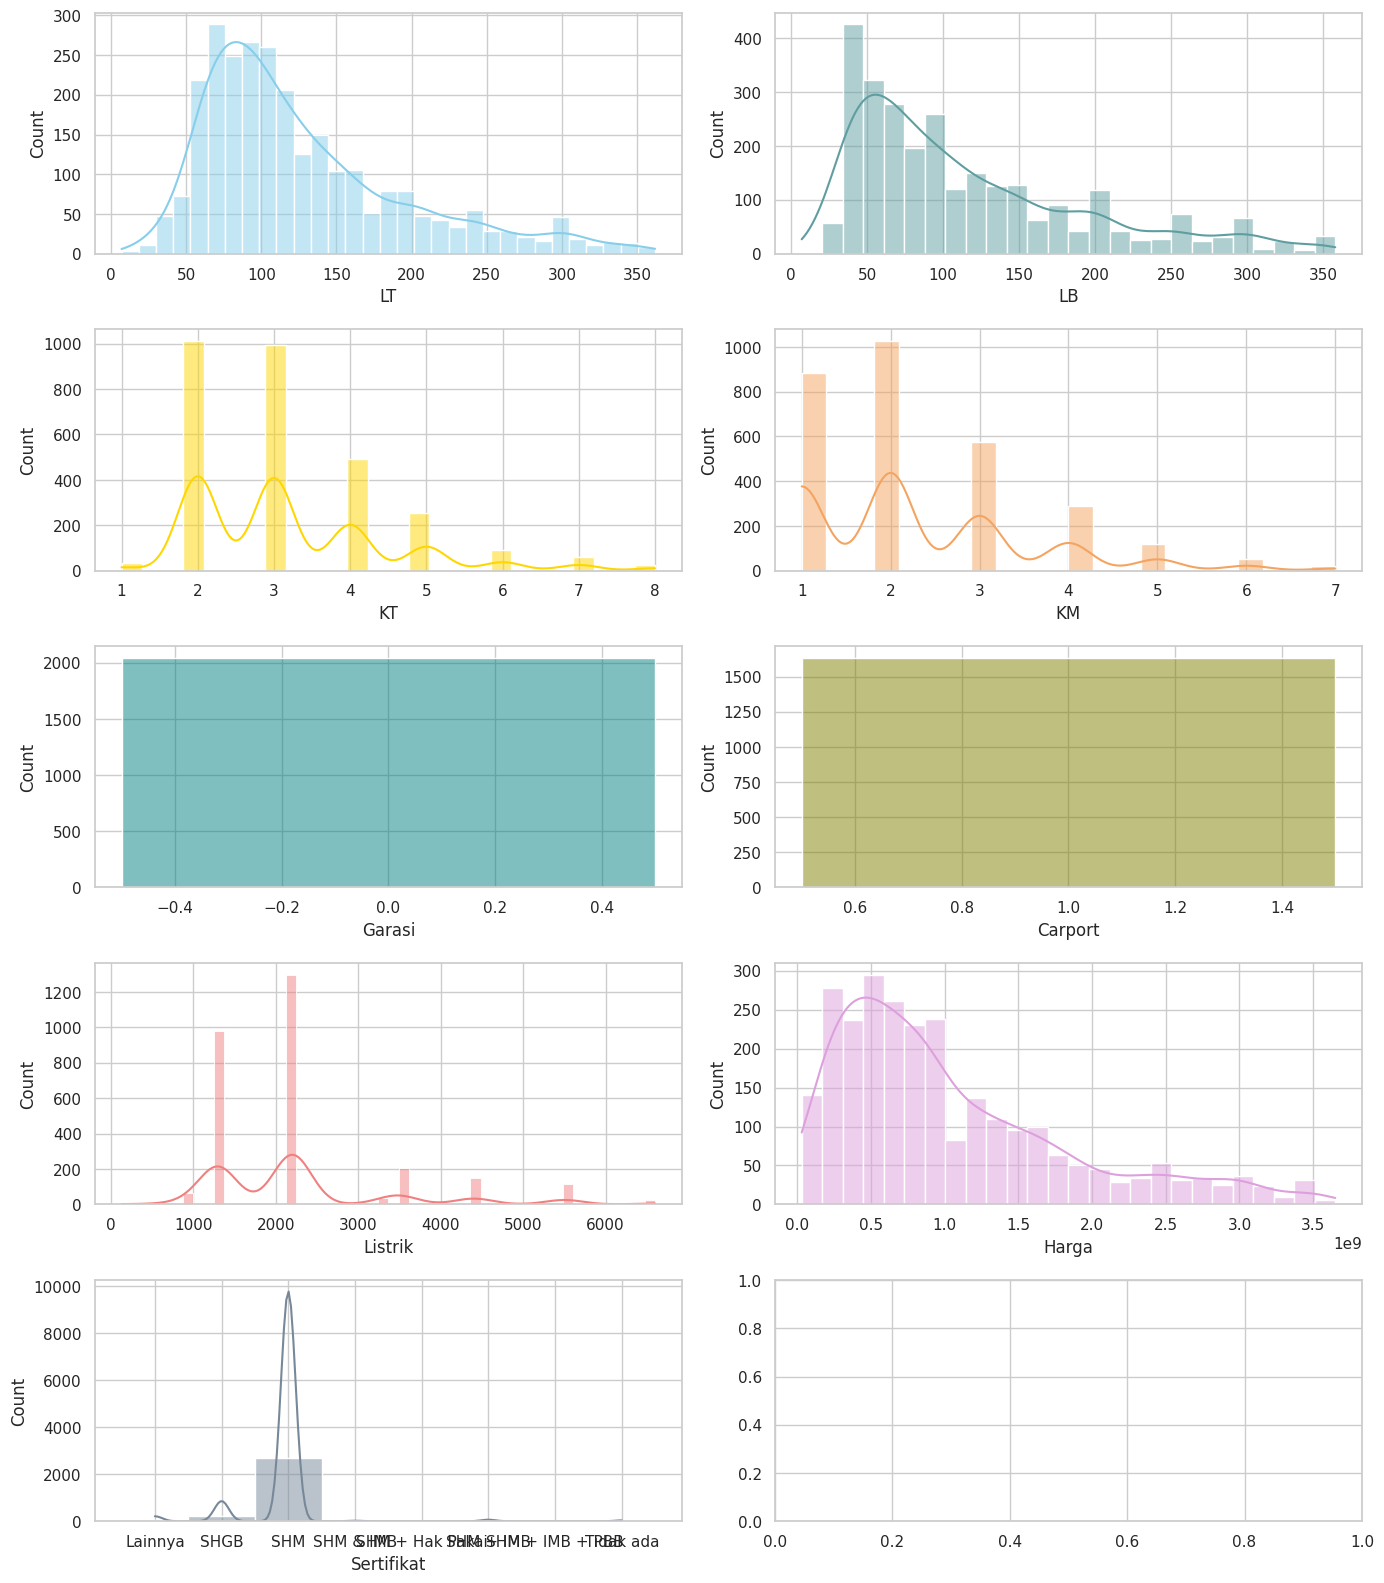

In [ ]:
sns.set(style="whitegrid")
fig,axs = plt.subplots(5,2, figsize = (14,16))
sns.histplot(data=df_outlt, x="LT", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=df_outlb, x="LB", kde=True, color="cadetblue", ax=axs[0, 1])
sns.histplot(data=df_outkt, x="KT", kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=df_outkm, x="KM", kde=True, color="sandybrown", ax=axs[1, 1])
sns.histplot(data=df_outgar, x="Garasi", kde=True, color="teal", ax=axs[2, 0])
sns.histplot(data=df_outcar, x="Carport", kde=True, color="olive", ax=axs[2, 1])
sns.histplot(data=df_outlist, x="Listrik", kde=True, color="lightcoral", ax=axs[3, 0])
sns.histplot(data=df_outharga, x="Harga", kde=True, color="plum", ax=axs[3, 1])
sns.histplot(data=df, x="Sertifikat", kde=True, color="lightslategray", ax=axs[4, 0])
fig.tight_layout()

Dari plot yang ditampilkan dapat terlihat secara kasar bahwa karakteristik rumah yang paling banyak dijual adalah sebagai berikut:


*   Memiliki Luas Tanah berkisar antara 60-110 meter persegi
*   Memiliki Luas Bangunan berkisar antara 40-100 meter persegi
*   Memiliki Kamar Tidur berjumlah 2 sampai 3 buah
*   Memiliki Kamar Mandi berjumlah 1 sampai 2 buah
*   Tidak memiliki Garasi
*   Memiliki Carport berjumlah 1 buah
*   Memiliki Listrik berkisar 1000-2200 Volt
*   Memiliki Harga berkisar 300 juta - 1 miliar rupiah
*   Bersertifikat SHM


Untuk mendapatkan nilai yang lebih spesifik terkait karakteristik rumah yang paling banyak dijual, kami melakukan perhitungan dengan menggunakan data yang telah dipisah sebelumnya.

Kami menggunakan median untuk menghitung rata-rata variabel LT, LB, Listrik, dan Harga karena terdapat beberapa values yang terlalu tinggi yang dapat mengganggu perhitungan rata-rata (apabila dengan mean). Sedangkan untuk menghitung rata-rata variabel KT, KM, Garasi, Carport, dan Sertifikat kami menggunakan modus (karena nilai berbentuk diskrit dan kategorik) untuk mencari nilai yang paling sering muncul dan dapat dijadikan rata-rata variabel.

In [ ]:
print('Karakteristik Rumah Yang Paling Banyak Dijual:')
print('LT:', df_outlt['LT'].median())
print('LB:', df_outlb['LB'].median())
print('KT:', df_outkt['KT'].mode()[0])
print('KM:', df_outkm['KM'].mode()[0])
print('Garasi:', df_outgar['Garasi'].mode()[0])
print('Carport:', df_outcar['Carport'].mode()[0])
print('Listrik:', df_outlist['Listrik'].median())
print('Harga:', df_outharga['Harga'].median())
print('Sertifikat:', df['Sertifikat'].mode()[0])

Karakteristik Rumah Yang Paling Banyak Dijual:
LT: 105.0
LB: 92.0
KT: 2
KM: 2
Garasi: 0
Carport: 1
Listrik: 2200.0
Harga: 800000000.0
Sertifikat: SHM


Didapatkan bahwa karakteristik rumah yangg paling banyak dijual adalah rumah yang memiliki luas tanah 105 meter persegi, luas bangunan 92 meter persegi, kamar tidur berjumlah 2 buah, kamar mandi berjumlah 2 buah, tidak memiliki garasi, carport berjumlah 1 buah, listrik 2200 volt, harga 800 juta rupiah, serta bersertifikat SHM

###Rekomendasi Rumah Apabila RPPI Akan Melakukan Investasi (Max) Rp25 Miliar

Berdasarkan variabel yang tersedia, terdapat beberapa hal yang harus diperhatikan dalam pertimbangan melakukan investasi properti, yaitu:
1. **Harga properti**, untuk menyesuaikan dengan budget yang tersedia, maksimum RP25 Miliar, agar diperoleh harga jual yang memang *worth it* untuk nilai yang diberikan.
2. **Lokasi properti**, karena dapat memengaruhi nilai investasi dan prospek pertumbuhan nilai properti di masa depan.
3. **Karakteristik properti**, untuk menyesuaikan dengan kebutuhan perusahaan dan potensi pengembangan properti tersebut.

Sebelumnya, telah dilakukan visualisasi boxplot untuk melihat kecenderungan harga rumah di wilayah tertentu dan diperoleh hasil bahwa 3 kota dengan median harga rumah tertinggi antara lain **Jakarta, Surabaya, dan Bali**. Oleh karena itu, **kami mempertimbangkan untuk melakukan visualisasi lebih mendalam pada wilayah Jakarta sebagai wilayah dengan kecenderungan harga rumah tertinggi**. Tujuannya, untuk melihat kecenderungan harga di daerah mana bagian Jakarta yang lebih murah. Dasar pemilihan Jakarta ini adalah karena Jakarta merupakan **pusat kota dan ekonomi Indonesia**. Selain itu, kita ketahui bahwa Jakarta **terus mengalami perkembangan infrastruktur**,seperti jaringan transportasi, fasilitas kesehatan, dan pendidikan. Ini bisa meningkatkan daya tarik investasi properti karena memudahkan akses dan meningkatkan kualitas hidup.

#### Membuat Data Frame Khusus Wilayah Jakarta

In [ ]:
df_jakarta = df[df['Wilayah'] == 'Jakarta']
df_jakarta.head()

,Created_at,LT,LB,KT,KM,Garasi,Carport,Lokasi,Sertifikat,Listrik,Harga,URL,Deskripsi,Wilayah
1316,2021-12-06,202,198,8,3,0,0,Jakarta Pusat,SHM,2200,4500000000,https://www.rumah.com/listing-properti/dijual-...,Dekat Cikini Salemba Taman Isamail Marzuki Kam...,Jakarta
1317,2021-12-02,30,55,2,1,0,1,Jakarta Pusat,SHM,2200,1100000000,https://www.rumah.com/listing-properti/dijual-...,"Mengusung konsep minimalis, dan didukung denga...",Jakarta
1318,2021-12-06,19,35,2,1,0,0,Jakarta Pusat,SHM,2200,395000000,https://www.rumah.com/listing-properti/dijual-...,"Dekat dengan Mall Atrium Senen, dekat dengan a...",Jakarta
1319,2021-12-06,33,42,2,2,0,1,Jakarta Pusat,SHM,2200,835000000,https://www.rumah.com/listing-properti/dijual-...,"Berlokasi sangat strategis, sangat dekat ke Tu...",Jakarta
1320,2021-12-06,30,55,2,2,0,1,Jakarta Pusat,SHM,2200,1100000000,https://www.rumah.com/listing-properti/dijual-...,"Bisa request ubah tata ruang, beli 2 unit mend...",Jakarta


In [ ]:
len(df_jakarta)

175

Dapat diketahui bahwa terdapat **175 rumah dijual** di wilayah Jakarta.

In [ ]:
df_jakarta['Lokasi']

1316                        Jakarta Pusat
1317                        Jakarta Pusat
1318                        Jakarta Pusat
1319                        Jakarta Pusat
1320                        Jakarta Pusat
                      ...                
1486         Cempaka Putih, Jakarta Pusat
1487         Pisangan Lama, Jakarta Timur
1488              Jelambar, Jakarta Barat
1489              Matraman, Jakarta Timur
1490    Pantai Indah Kapuk, Jakarta Utara
Name: Lokasi, Length: 175, dtype: category
Categories (656, object): ['\nPelita Raya Tengah, Makassar', ' Bogor Barat', ' Jl. Hasanudin Toto, Palu Kota',
                           ' Jln Jendral Sudirman, Tojo Una Una Kab', ..., 'sambaliung, Sambaliung, Berau',
                           'sentolo utara, Pahandut, Palangka Raya, Kalim..., 'siteba nanggalo padang',
                           'tanjung seneng bandar Lampung']

In [ ]:
df_jakarta['Lokasi'].cat.remove_unused_categories(inplace=True)

<ipython-input-95-c4e4fd13f528>:1: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df_jakarta['Lokasi'].cat.remove_unused_categories(inplace=True)


Akan **diubah nama-nama lokasi penjualan rumah** agar seragam untuk dianalisis lebih lanjut.

In [ ]:
df_jakarta.loc[df_jakarta['Lokasi'] == 'Tanjung Duren, Jakarta Barat', 'Lokasi'] = 'Jakarta Barat'
df_jakarta.loc[df_jakarta['Lokasi'] == 'Tamansari, Jakarta Barat', 'Lokasi'] = 'Jakarta Barat'
df_jakarta.loc[df_jakarta['Lokasi'] == 'Cempaka Putih, Jakarta Pusat', 'Lokasi'] = 'Jakarta Pusat'
df_jakarta.loc[df_jakarta['Lokasi'] == 'Pisangan Lama, Jakarta Timur', 'Lokasi'] = 'Jakarta Timur'
df_jakarta.loc[df_jakarta['Lokasi'] == 'Matraman, Jakarta Timur', 'Lokasi'] = 'Jakarta Timur'
df_jakarta.loc[df_jakarta['Lokasi'] == 'Jelambar, Jakarta Barat', 'Lokasi'] = 'Jakarta Barat'
df_jakarta.loc[df_jakarta['Lokasi'] == 'Pantai Indah Kapuk, Jakarta Utara', 'Lokasi'] = 'Jakarta Utara '
df_jakarta.loc[df_jakarta['Lokasi'] == 'Cibubur, Jakarta Timur', 'Lokasi'] = 'Jakarta Timur'
df_jakarta.loc[df_jakarta['Lokasi'] == 'Cilandak, Jakarta Selatan', 'Lokasi'] = 'Jakarta Selatan'
df_jakarta.loc[df_jakarta['Lokasi'] == 'Rawamangun, Jakarta Timur', 'Lokasi'] = 'Jakarta Timur'
df_jakarta.loc[df_jakarta['Lokasi'] == 'Cilangkap, Jakarta Timur', 'Lokasi'] = 'Jakarta Timur'
df_jakarta.loc[df_jakarta['Lokasi'] == 'Cipayung, Jakarta Timur', 'Lokasi'] = 'Jakarta Timur'
df_jakarta.loc[df_jakarta['Lokasi'] == 'Cipinang, Jakarta Timur', 'Lokasi'] = 'Jakarta Timur'
df_jakarta.loc[df_jakarta['Lokasi'] == 'Condet, Jakarta Timur', 'Lokasi'] = 'Jakarta Timur'
df_jakarta.loc[df_jakarta['Lokasi'] == 'Jatinegara, Jakarta Timur', 'Lokasi'] = 'Jakarta Timur'
df_jakarta.loc[df_jakarta['Lokasi'] == 'Kota Wisata, Jakarta Timur', 'Lokasi'] = 'Jakarta Timur'
df_jakarta.loc[df_jakarta['Lokasi'] == 'Fatmawati', 'Lokasi'] = 'Jakarta Selatan'
df_jakarta.loc[df_jakarta['Lokasi'] == 'Green Lake City', 'Lokasi'] = 'Jakarta Barat'
df_jakarta.loc[df_jakarta['Lokasi'] == 'Jagakarsa, Jakarta Selatan', 'Lokasi'] = 'Jakarta Selatan'
df_jakarta.loc[df_jakarta['Lokasi'] == 'Pondok Gede, Jakarta Timur', 'Lokasi'] = 'Jakarta Timur'
df_jakarta.loc[df_jakarta['Lokasi'] == 'Pondok Labu, Jakarta Selatan', 'Lokasi'] = 'Jakarta Selatan'

In [ ]:
df_jakarta['Lokasi']

1316     Jakarta Pusat
1317     Jakarta Pusat
1318     Jakarta Pusat
1319     Jakarta Pusat
1320     Jakarta Pusat
             ...      
1486     Jakarta Pusat
1487     Jakarta Timur
1488     Jakarta Barat
1489     Jakarta Timur
1490    Jakarta Utara 
Name: Lokasi, Length: 175, dtype: category
Categories (26, object): ['Cempaka Putih, Jakarta Pusat', 'Cibubur, Jakarta Timur', 'Cilandak, Jakarta Selatan',
                          'Cilangkap, Jakarta Timur', ..., 'Pondok Labu, Jakarta Selatan',
                          'Rawamangun, Jakarta Timur', 'Tamansari, Jakarta Barat',
                          'Tanjung Duren, Jakarta Barat']

In [ ]:
df_jakarta['Lokasi'].cat.remove_unused_categories(inplace=True)

<ipython-input-98-c4e4fd13f528>:1: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df_jakarta['Lokasi'].cat.remove_unused_categories(inplace=True)


In [ ]:
df_jakarta['Lokasi']

1316     Jakarta Pusat
1317     Jakarta Pusat
1318     Jakarta Pusat
1319     Jakarta Pusat
1320     Jakarta Pusat
             ...      
1486     Jakarta Pusat
1487     Jakarta Timur
1488     Jakarta Barat
1489     Jakarta Timur
1490    Jakarta Utara 
Name: Lokasi, Length: 175, dtype: category
Categories (5, object): ['Jakarta Barat', 'Jakarta Pusat', 'Jakarta Selatan', 'Jakarta Timur',
                         'Jakarta Utara ']

#### Melihat Kecenderungan Harga Rumah di Jakarta

<Figure size 1200x600 with 0 Axes>

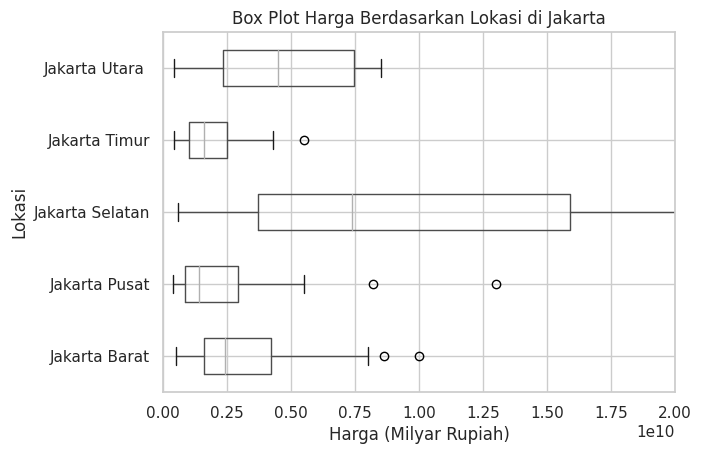

In [ ]:
# Membuat boxplot harga rumah berdasarkan lokasi di Jakarta
plt.figure(figsize=(12,6))
boxplot = df_jakarta.boxplot(column='Harga', by='Lokasi', vert=False)
plt.title('Box Plot Harga Berdasarkan Lokasi di Jakarta')
plt.suptitle('')
plt.ylabel('Lokasi')
plt.xlabel('Harga (Milyar Rupiah)')
plt.xlim(0, 20000000000)
plt.grid(True)

# Show the plot
plt.show()

Berdasarkan hasil visualiasi box plot di atas, diperoleh informasi bahwa lokasi di Jakarta dengan median harga rumah tertinggi adalah Jakarta Selatan dan terendah adalah Jakarta Pusat. Oleh karena itu, **kami mempertimbangkan untuk memilih daerah Jakarta Pusat sebagai lokasi dengan kecenderungan median harga rumah terendah di Jakarta** untuk di visualisasi lebih mendalam. Hal ini dikarenakan selain merupakan lokasi dengan kecenderungan harga rumah terendah di Jakarta, Jakarta Pusat berada di tengah-tengah aktivitas kota sehingga akses yang lebih mudah ke pusat bisnis dan pemerintahan. Namun, perlu diperhatikan kembali tujuan dilakukan investasi, sehingga lokasinya dapat lebih disesuaikan.

#### Melihat Harga Rumah di Jakarta Pusat < Rp25 Miliar

In [ ]:
df_jakpus = df_jakarta[df_jakarta['Lokasi'] == 'Jakarta Pusat']
df_jakpus

,Created_at,LT,LB,KT,KM,Garasi,Carport,Lokasi,Sertifikat,Listrik,Harga,URL,Deskripsi,Wilayah
1316,2021-12-06,202,198,8,3,0,0,Jakarta Pusat,SHM,2200,4500000000,https://www.rumah.com/listing-properti/dijual-...,Dekat Cikini Salemba Taman Isamail Marzuki Kam...,Jakarta
1317,2021-12-02,30,55,2,1,0,1,Jakarta Pusat,SHM,2200,1100000000,https://www.rumah.com/listing-properti/dijual-...,"Mengusung konsep minimalis, dan didukung denga...",Jakarta
1318,2021-12-06,19,35,2,1,0,0,Jakarta Pusat,SHM,2200,395000000,https://www.rumah.com/listing-properti/dijual-...,"Dekat dengan Mall Atrium Senen, dekat dengan a...",Jakarta
1319,2021-12-06,33,42,2,2,0,1,Jakarta Pusat,SHM,2200,835000000,https://www.rumah.com/listing-properti/dijual-...,"Berlokasi sangat strategis, sangat dekat ke Tu...",Jakarta
1320,2021-12-06,30,55,2,2,0,1,Jakarta Pusat,SHM,2200,1100000000,https://www.rumah.com/listing-properti/dijual-...,"Bisa request ubah tata ruang, beli 2 unit mend...",Jakarta
1321,2021-12-06,217,245,6,4,0,2,Jakarta Pusat,SHM,4400,5500000000,https://www.rumah.com/listing-properti/dijual-...,Tidak ada,Jakarta
1322,2021-12-06,424,1000,4,5,1,1,Jakarta Pusat,SHM,33000,49500000000,https://www.rumah.com/listing-properti/dijual-...,"Rumah mewah berkonsep hotel bintang 5, interio...",Jakarta
1323,2021-12-06,597,700,5,4,2,5,Jakarta Pusat,SHM,8000,40000000000,https://www.rumah.com/listing-properti/dijual-...,Lokasi strategis hanya 5 menit ke pusat kulin...,Jakarta
1324,2021-12-06,60,98,3,3,0,1,Jakarta Pusat,SHM,2200,1700000000,https://www.rumah.com/listing-properti/dijual-...,Lokasi strategis di perbatasan Jakarta Barat d...,Jakarta
1325,2021-12-06,33,42,2,1,0,1,Jakarta Pusat,SHM,2200,835000000,https://www.rumah.com/listing-properti/dijual-...,"Desain menarik dengan konsep Townhouse, akses ...",Jakarta


In [ ]:
len(df_jakpus)

55

Dapat dilihat bahwa terdapat **55 rumah yang dijual** di daerah Jakarta Pusat.

Diberikan informasi bahwa Perusahaan RPPI ingin melakukan investasi dengan nominal maksimum Rp25 Milyar. Oleh karena itu, **akan dilihat rumah di Jakarta Pusat dengan harga < Rp25 Miliar**.

In [ ]:
df_jakpus_filt = df_jakpus[df_jakpus['Harga'] < 25000000000]
df_jakpus_filt

,Created_at,LT,LB,KT,KM,Garasi,Carport,Lokasi,Sertifikat,Listrik,Harga,URL,Deskripsi,Wilayah
1316,2021-12-06,202,198,8,3,0,0,Jakarta Pusat,SHM,2200,4500000000,https://www.rumah.com/listing-properti/dijual-...,Dekat Cikini Salemba Taman Isamail Marzuki Kam...,Jakarta
1317,2021-12-02,30,55,2,1,0,1,Jakarta Pusat,SHM,2200,1100000000,https://www.rumah.com/listing-properti/dijual-...,"Mengusung konsep minimalis, dan didukung denga...",Jakarta
1318,2021-12-06,19,35,2,1,0,0,Jakarta Pusat,SHM,2200,395000000,https://www.rumah.com/listing-properti/dijual-...,"Dekat dengan Mall Atrium Senen, dekat dengan a...",Jakarta
1319,2021-12-06,33,42,2,2,0,1,Jakarta Pusat,SHM,2200,835000000,https://www.rumah.com/listing-properti/dijual-...,"Berlokasi sangat strategis, sangat dekat ke Tu...",Jakarta
1320,2021-12-06,30,55,2,2,0,1,Jakarta Pusat,SHM,2200,1100000000,https://www.rumah.com/listing-properti/dijual-...,"Bisa request ubah tata ruang, beli 2 unit mend...",Jakarta
1321,2021-12-06,217,245,6,4,0,2,Jakarta Pusat,SHM,4400,5500000000,https://www.rumah.com/listing-properti/dijual-...,Tidak ada,Jakarta
1324,2021-12-06,60,98,3,3,0,1,Jakarta Pusat,SHM,2200,1700000000,https://www.rumah.com/listing-properti/dijual-...,Lokasi strategis di perbatasan Jakarta Barat d...,Jakarta
1325,2021-12-06,33,42,2,1,0,1,Jakarta Pusat,SHM,2200,835000000,https://www.rumah.com/listing-properti/dijual-...,"Desain menarik dengan konsep Townhouse, akses ...",Jakarta
1326,2021-12-05,71,83,3,2,0,1,Jakarta Pusat,SHM,2200,1880000000,https://www.rumah.com/listing-properti/dijual-...,"Lokasi pusat bisnis perekonomian Indonesia, de...",Jakarta
1327,2021-12-05,75,260,10,10,0,3,Jakarta Pusat,SHM,3500,5300000000,https://www.rumah.com/listing-properti/dijual-...,Bangunan baru,Jakarta


In [ ]:
jumlah_rumah = len(df_jakpus_filt)
print(f"Jumlah rumah di Jakarta Pusat dengan harga kurang dari Rp25 miliar: {jumlah_rumah}")

Jumlah rumah di Jakarta Pusat dengan harga kurang dari Rp25 miliar: 50


Diketahui bahwa terdapat **50 rumah di Jakarta Pusat yang dijual dengan harga < Rp25 Miliar**.

In [ ]:
df_jakpus_filt.sort_values(by='Harga')

,Created_at,LT,LB,KT,KM,Garasi,Carport,Lokasi,Sertifikat,Listrik,Harga,URL,Deskripsi,Wilayah
1336,2021-12-02,16,32,1,1,0,0,Jakarta Pusat,SHM,2200,380000000,https://www.rumah.com/listing-properti/dijual-...,Sangat cocok untuk huni dan investasi. Lokasi ...,Jakarta
1437,2023-06-06,19,36,2,2,0,0,Jakarta Pusat,SHM,2200,388000000,https://www.rumah123.com/properti/jakarta-pusa...,Rumah 2 lantai murah nan manis.desain minimali...,Jakarta
1318,2021-12-06,19,35,2,1,0,0,Jakarta Pusat,SHM,2200,395000000,https://www.rumah.com/listing-properti/dijual-...,"Dekat dengan Mall Atrium Senen, dekat dengan a...",Jakarta
1338,2021-12-07,18,33,2,1,0,0,Jakarta Pusat,SHM,2200,425000000,https://www.rumah.com/listing-properti/dijual-...,"Kualitas bangunan & material terbaik, one gate...",Jakarta
1457,2023-06-06,20,38,2,2,0,0,Jakarta Pusat,SHM,2200,440000000,https://www.rumah123.com/properti/jakarta-pusa...,RUMAH CLUSTER / JAKARTA PUSAT,Jakarta
1465,2023-06-06,20,38,2,2,0,0,Jakarta Pusat,SHM,2200,440000000,https://www.rumah123.com/properti/jakarta-pusa...,Rumah cluster murah dan modern sangat cocok un...,Jakarta
1329,2021-12-05,24,46,2,1,0,0,Jakarta Pusat,SHM,2200,450000000,https://www.rumah.com/listing-properti/dijual-...,Bebas banjir,Jakarta
1459,2023-06-06,22,42,2,2,0,0,Jakarta Pusat,SHM,2200,486000000,RUMAH MINIMALIS TERMURAH DI JLN PERCETAKAN NEG...,Rumah di percetakan negara jakarta pusat lokas...,Jakarta
1460,2023-06-06,23,42,2,2,0,0,Jakarta Pusat,SHM,2200,499000000,RUMAH TERMURAH DI SUMUR BATU JAKARTA PUSAT | R...,Rumah Semi Cluster perumahan cantik dengan ban...,Jakarta
1335,2021-12-02,21,37,2,1,0,0,Jakarta Pusat,SHM,1300,533000000,https://www.rumah.com/listing-properti/dijual-...,Tidak ada,Jakarta


Diketahui bahwa **harga rumah terendah yang dijual adalah Rp380 Juta** dan **harga rumah tertinggi yang dijual adalah Rp13 Miliar**.

#### Melihat Variabel `LT` dan `LB` yang Dijual

In [ ]:
df_jakpus_filt.sort_values(by='LT')

,Created_at,LT,LB,KT,KM,Garasi,Carport,Lokasi,Sertifikat,Listrik,Harga,URL,Deskripsi,Wilayah
1336,2021-12-02,16,32,1,1,0,0,Jakarta Pusat,SHM,2200,380000000,https://www.rumah.com/listing-properti/dijual-...,Sangat cocok untuk huni dan investasi. Lokasi ...,Jakarta
1338,2021-12-07,18,33,2,1,0,0,Jakarta Pusat,SHM,2200,425000000,https://www.rumah.com/listing-properti/dijual-...,"Kualitas bangunan & material terbaik, one gate...",Jakarta
1437,2023-06-06,19,36,2,2,0,0,Jakarta Pusat,SHM,2200,388000000,https://www.rumah123.com/properti/jakarta-pusa...,Rumah 2 lantai murah nan manis.desain minimali...,Jakarta
1318,2021-12-06,19,35,2,1,0,0,Jakarta Pusat,SHM,2200,395000000,https://www.rumah.com/listing-properti/dijual-...,"Dekat dengan Mall Atrium Senen, dekat dengan a...",Jakarta
1465,2023-06-06,20,38,2,2,0,0,Jakarta Pusat,SHM,2200,440000000,https://www.rumah123.com/properti/jakarta-pusa...,Rumah cluster murah dan modern sangat cocok un...,Jakarta
1457,2023-06-06,20,38,2,2,0,0,Jakarta Pusat,SHM,2200,440000000,https://www.rumah123.com/properti/jakarta-pusa...,RUMAH CLUSTER / JAKARTA PUSAT,Jakarta
1335,2021-12-02,21,37,2,1,0,0,Jakarta Pusat,SHM,1300,533000000,https://www.rumah.com/listing-properti/dijual-...,Tidak ada,Jakarta
1459,2023-06-06,22,42,2,2,0,0,Jakarta Pusat,SHM,2200,486000000,RUMAH MINIMALIS TERMURAH DI JLN PERCETAKAN NEG...,Rumah di percetakan negara jakarta pusat lokas...,Jakarta
1331,2021-12-05,23,40,2,2,1,0,Jakarta Pusat,SHM,2200,735000000,https://www.rumah.com/listing-properti/dijual-...,"Rumah 2 lantai mewah, nyaman, bebas banjir",Jakarta
1460,2023-06-06,23,42,2,2,0,0,Jakarta Pusat,SHM,2200,499000000,RUMAH TERMURAH DI SUMUR BATU JAKARTA PUSAT | R...,Rumah Semi Cluster perumahan cantik dengan ban...,Jakarta


Dapat dilihat bahwa luas tanah berkisar dari $16 m^2$ hingga $3422 m^2$. Namun, rumah dengan luas tanah $3422 m^2$ dirasa cukup janggal karena perbandingan antara `LT` dengan `LB` sangat jauh dengan harga yang rada kurang logis. Sehingga rumah tersebut tidak akan diperhatikan.

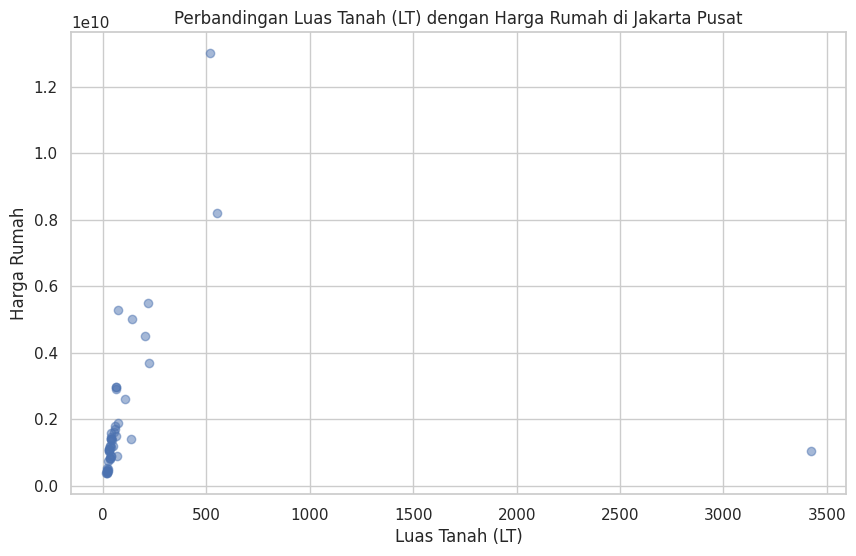

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df_jakpus_filt['LT'], df_jakpus_filt['Harga'], alpha=0.5)
plt.title('Perbandingan Luas Tanah (LT) dengan Harga Rumah di Jakarta Pusat')
plt.xlabel('Luas Tanah (LT)')
plt.ylabel('Harga Rumah')
plt.grid(True)
plt.show()

Berdasarkan hasil visualisasi menggunakan scatterplot di atas, ditemukan satu rumah dengan luas tanah $>500m^2$ dengan harga berkisar di angka Rp8 Miliar.

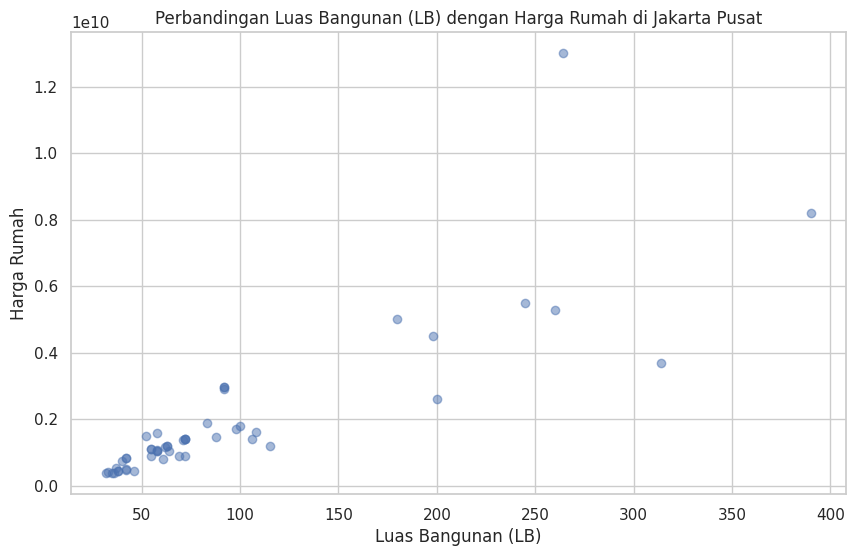

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df_jakpus_filt['LB'], df_jakpus_filt['Harga'], alpha=0.5)
plt.title('Perbandingan Luas Bangunan (LB) dengan Harga Rumah di Jakarta Pusat')
plt.xlabel('Luas Bangunan (LB)')
plt.ylabel('Harga Rumah')
plt.grid(True)
plt.show()

Berdasarkan hasil visualisasi menggunakan scatterplot di atas, ditemukan satu rumah dengan luas bangunan mendekati $400m^2$ dengan harga yang juga berkisar di angka Rp8 Miliar. Dan jika diperhatikan kembali, ternyata rumah tersebut adalah rumah dengan luas tanah $550m^2$.

#### Melihat Perubahan Harga Rata-Rata Rumah Dijual Antara Tahun 2021 dengan 2023 di Jakarta Pusat

In [ ]:
df_jakpus_filt_year = df_jakpus_filt['Tahun'] = df_jakpus_filt['Created_at'].dt.year
df_jakpus_filt

<ipython-input-109-556c0b7290e5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_jakpus_filt_year = df_jakpus_filt['Tahun'] = df_jakpus_filt['Created_at'].dt.year


,Created_at,LT,LB,KT,KM,Garasi,Carport,Lokasi,Sertifikat,Listrik,Harga,URL,Deskripsi,Wilayah,Tahun
1316,2021-12-06,202,198,8,3,0,0,Jakarta Pusat,SHM,2200,4500000000,https://www.rumah.com/listing-properti/dijual-...,Dekat Cikini Salemba Taman Isamail Marzuki Kam...,Jakarta,2021
1317,2021-12-02,30,55,2,1,0,1,Jakarta Pusat,SHM,2200,1100000000,https://www.rumah.com/listing-properti/dijual-...,"Mengusung konsep minimalis, dan didukung denga...",Jakarta,2021
1318,2021-12-06,19,35,2,1,0,0,Jakarta Pusat,SHM,2200,395000000,https://www.rumah.com/listing-properti/dijual-...,"Dekat dengan Mall Atrium Senen, dekat dengan a...",Jakarta,2021
1319,2021-12-06,33,42,2,2,0,1,Jakarta Pusat,SHM,2200,835000000,https://www.rumah.com/listing-properti/dijual-...,"Berlokasi sangat strategis, sangat dekat ke Tu...",Jakarta,2021
1320,2021-12-06,30,55,2,2,0,1,Jakarta Pusat,SHM,2200,1100000000,https://www.rumah.com/listing-properti/dijual-...,"Bisa request ubah tata ruang, beli 2 unit mend...",Jakarta,2021
1321,2021-12-06,217,245,6,4,0,2,Jakarta Pusat,SHM,4400,5500000000,https://www.rumah.com/listing-properti/dijual-...,Tidak ada,Jakarta,2021
1324,2021-12-06,60,98,3,3,0,1,Jakarta Pusat,SHM,2200,1700000000,https://www.rumah.com/listing-properti/dijual-...,Lokasi strategis di perbatasan Jakarta Barat d...,Jakarta,2021
1325,2021-12-06,33,42,2,1,0,1,Jakarta Pusat,SHM,2200,835000000,https://www.rumah.com/listing-properti/dijual-...,"Desain menarik dengan konsep Townhouse, akses ...",Jakarta,2021
1326,2021-12-05,71,83,3,2,0,1,Jakarta Pusat,SHM,2200,1880000000,https://www.rumah.com/listing-properti/dijual-...,"Lokasi pusat bisnis perekonomian Indonesia, de...",Jakarta,2021
1327,2021-12-05,75,260,10,10,0,3,Jakarta Pusat,SHM,3500,5300000000,https://www.rumah.com/listing-properti/dijual-...,Bangunan baru,Jakarta,2021


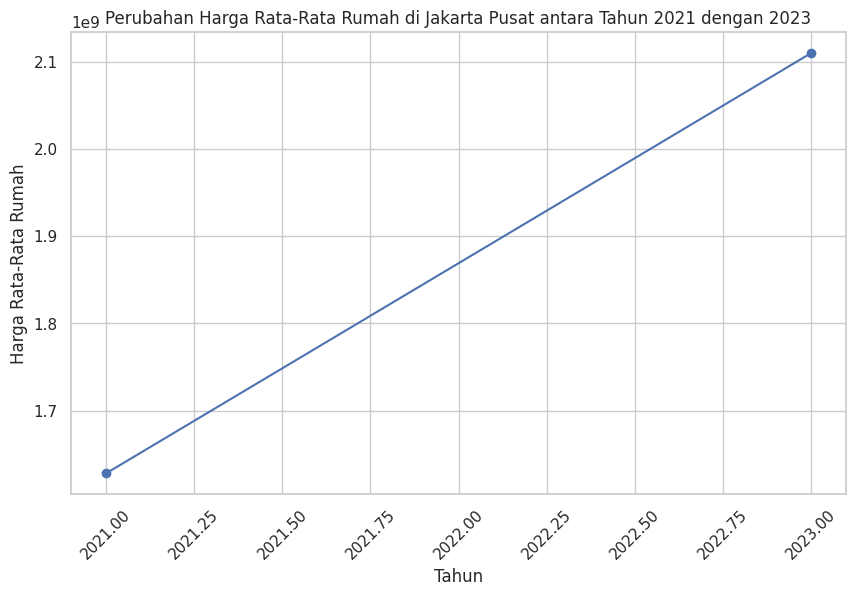

In [ ]:
harga_ratarata_jakpus = df_jakpus_filt.groupby('Tahun')['Harga'].mean()
plt.figure(figsize=(10, 6))
plt.plot(harga_ratarata_jakpus.index, harga_ratarata_jakpus.values, marker='o', linestyle='-')
plt.title('Perubahan Harga Rata-Rata Rumah di Jakarta Pusat antara Tahun 2021 dengan 2023')
plt.xlabel('Tahun')
plt.ylabel('Harga Rata-Rata Rumah')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

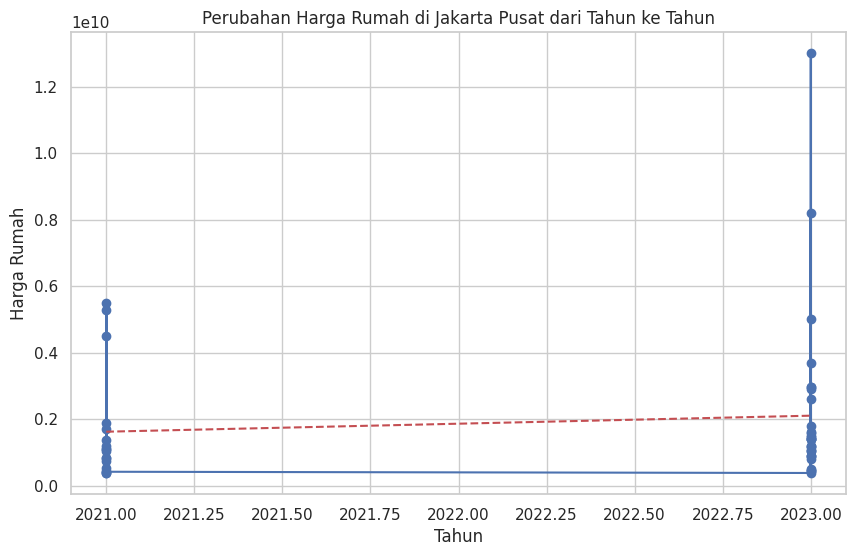

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df_jakpus_filt['Tahun'], df_jakpus_filt['Harga'], marker='o', linestyle='-')
plt.title('Perubahan Harga Rumah di Jakarta Pusat dari Tahun ke Tahun')
plt.xlabel('Tahun')
plt.ylabel('Harga Rumah')
plt.grid(True)

# Menambahkan garis tren (regresi linear)
z = np.polyfit(df_jakpus_filt['Tahun'], df_jakpus_filt['Harga'], 1)
p = np.poly1d(z)
plt.plot(df_jakpus_filt['Tahun'], p(df_jakpus_filt['Tahun']), "r--")

plt.show()

Berdasarkan hasil visualisasi di atas, dapat diketahui bahwa **harga rata-rata rumah di Jakarta Pusat meningkat dari tahun 2021 ke tahun 2023**. Oleh karena itu, **akan dapat diprediksi bahwa kemungkinan harga rata-rata rumah akan meningkat juga di tahun-tahun kedepannya**.

#### Kesimpulan Rekomendasi Rumah untuk Investasi


Berdasarkan semua hasil visualisasi yang mempertimbangkan harga, lokasi, dan karakteristik rumah yaitu `LT` dan `LB`, kami mempertimbangkan agar Perusahaan RPPI melakukan investasi dengan nominal maksimal Rp25 Miliar dengan membeli rumah di daerah **Jakarta Pusat** karena berada di wilayah Jakarta yang kemungkinan nilainya cenderung mengalami kenaikan seiring dengan pertumbuhan ekonomi dan perkembangan infrastruktur. Hal ini dapat dilihat juga berdasarkan hasil visualisasi mengenai perubahan harga rata-rata rumah di Jakarta Pusat antara tahun 2021 dengan 2023, bahwa terdapat kenaikan harga rata-rata rumah. Namun, meskipun di Jakarta, Jakarta Pusat merupakan lokasi yang memiliki kecenderungan median harga rumah termurah dibandingkan lokasi di Jakarta lainnya.
<br>
<br>
Salah satu rumah yang mungkin bisa dipertimbangkan adalah rumah yang dijual di Cempaka Putih, Jakarta Pusat dengan `LT` $550m^2$, `LB` $390m^2$, 5 `KM`, 4 `KM`, 3 *carport*, SHM, dan daya listrik 2200 Watt dengan harga **Rp8,2 Miliar**. Tentunya pertimbangan ini harus didiskusikan kembali untuk menyesuaikan dengan tujuan investasi perusahaan dan faktor-faktor lainnya.